<a href="https://colab.research.google.com/github/SergeiVKalinin/PNNL_ML_2024/blob/main/Day_3_PCA_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutorial notebook for the Fall 2023 Course "Machine Learning for Materials Science", University of Tennessee Knoxville, Department of Materials Science and Engineering.

- Instructor Sergei V. Kalinin

- These examples are partially based on the Sebastian Rashka book, https://subscription.packtpub.com/book/data/9781801819312

- The atoms data set is gracefully provided by Prof. Rampi Ramprasad, Georgia Instutute of Technology

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

import pandas as pd
import seaborn as sns

# PCA and LDA

## Import Atom Dataset

In [2]:
!gdown https://drive.google.com/uc?id=1SygYRQ4Iom2ZP7dANIyay7NIoCra2bE1

Downloading...
From: https://drive.google.com/uc?id=1SygYRQ4Iom2ZP7dANIyay7NIoCra2bE1
To: /content/atoms.csv
100% 5.89k/5.89k [00:00<00:00, 12.4MB/s]


In [3]:
df = pd.read_csv('/content/atoms.csv')
df.head()

Symbol  Atomic_radius  Covalent_radius  Density  Pauling_Electronegativity  \
0      H             53               31   0.0708                       2.20   
1     He             31               28   0.1470                       0.00   
2     Li            167              128   0.5340                       0.98   
3     Be            112               96   1.8480                       1.57   
4      B             87               84   2.3400                       2.04   

   Electron_affinity  First_Ionisation_Energy  Heat_Evaporation  \
0             72.769                   1311.3             0.904   
1            -50.000                   2361.3             0.080   
2             59.632                    519.9           148.000   
3            -50.000                    898.8           309.000   
4             26.989                    800.2           504.500   

   Melting_Point  Boiling_Point  Specific_Heat  Specific_Volume  \
0          14.01         20.280         14.267             14.1   
1           0.95          4.216          5.188             31.8   
2         553.69       1118.150          3.489             13.1   
3        1551.00       3243.000          1.824              5.0   
4        2573.00       3931.000          1.025              4.6   

   Thermal_Conductivity  Max_Oxidation_States  
0                0.1815                     1  
1                0.1520                     2  
2               84.8000                     1  
3              201.0000                     2  
4               27.4000                     3

In [4]:
df['Symbol'].values

array([' H', ' He', ' Li', ' Be', ' B', ' C', ' N', ' O', ' F', ' Ne',
       ' Na', ' Mg', ' Al', ' Si', ' P', ' S', ' Cl', ' Ar', ' K', ' Ca',
       ' Sc', ' Ti', ' V', ' Cr', ' Mn', ' Fe', ' Co', ' Ni', ' Cu',
       ' Zn', ' Ga', ' Ge', ' As', ' Se', ' Br', ' Kr', ' Rb', ' Sr',
       ' Y', ' Zr', ' Nb', ' Mo', ' Tc', ' Ru', ' Rh', ' Pd', ' Ag',
       ' Cd', ' In', ' Sn', ' Sb', ' Te', ' I', ' Xe', ' Cs', ' Ba',
       ' La', ' Ce', ' Pr', ' Nd', ' Pm', ' Sm', ' Eu', ' Gd', ' Tb',
       ' Dy', ' Ho', ' Er', ' Tm', ' Yb', ' Lu', ' Hf', ' Ta', ' W',
       ' Re', ' Os', ' Ir', ' Pt', ' Au', ' Hg', ' Tl', ' Pb', ' Bi',
       ' Po'], dtype=object)

In [5]:
# prompt: Create three additional columns in the DataFrame df.
#One column is Alkali and should have values 1 if value of column Symbol is Li, Na, K, Rb, and Cs and 0 otherwise.
#The second should be Alcali Eart and be 1 if Symbol is Be, Ca, Ba, Sr and 0 otherwise.
#Finally, third should be Halogen and be 1 if the Symbol is F, Cl, Br, I, At, and 0 otherwise.

df['Alkali'] = (df['Symbol'].isin([' Li', ' Na', ' K', ' Rb', ' Cs'])).astype(int)
df['Alkali_Earth'] = (df['Symbol'].isin([' Be', ' Ca', ' Ba', ' Sr'])).astype(int)
df['Halogen'] = (df['Symbol'].isin([' F', ' Cl', ' Br', ' I', ' At'])).astype(int)

df2 = df #Let's make a copy for later use

df.head()

Symbol  Atomic_radius  Covalent_radius  Density  Pauling_Electronegativity  \
0      H             53               31   0.0708                       2.20   
1     He             31               28   0.1470                       0.00   
2     Li            167              128   0.5340                       0.98   
3     Be            112               96   1.8480                       1.57   
4      B             87               84   2.3400                       2.04   

   Electron_affinity  First_Ionisation_Energy  Heat_Evaporation  \
0             72.769                   1311.3             0.904   
1            -50.000                   2361.3             0.080   
2             59.632                    519.9           148.000   
3            -50.000                    898.8           309.000   
4             26.989                    800.2           504.500   

   Melting_Point  Boiling_Point  Specific_Heat  Specific_Volume  \
0          14.01         20.280         14.267             14.1   
1           0.95          4.216          5.188             31.8   
2         553.69       1118.150          3.489             13.1   
3        1551.00       3243.000          1.824              5.0   
4        2573.00       3931.000          1.025              4.6   

   Thermal_Conductivity  Max_Oxidation_States  Alkali  Alkali_Earth  Halogen  
0                0.1815                     1       0             0        0  
1                0.1520                     2       0             0        0  
2               84.8000                     1       1             0        0  
3              201.0000                     2       0             1        0  
4               27.4000                     3       0             0        0

## PCA on Elements

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
df.columns

Index(['Symbol', 'Atomic_radius', 'Covalent_radius', 'Density',
       'Pauling_Electronegativity', 'Electron_affinity',
       'First_Ionisation_Energy', 'Heat_Evaporation', 'Melting_Point',
       'Boiling_Point', 'Specific_Heat', 'Specific_Volume',
       'Thermal_Conductivity', 'Max_Oxidation_States', 'Alkali',
       'Alkali_Earth', 'Halogen'],
      dtype='object')

In [8]:
# prompt: Run a PCA analysis on the columns  [''Atomic_radius', 'Covalent_radius', 'Density',
#        'Pauling_Electronegativity', 'Electron_affinity', 'First_Ionisation_Energy',
#        'Heat_Evaporation', 'Melting_Point', 'Boiling_Point', 'Specific_Heat', 'Specific_Volume',
#        'Thermal_Conductivity', 'Max_Oxidation_States']

df_1 = df[['Atomic_radius', 'Covalent_radius','Density', 'Pauling_Electronegativity',
             'Electron_affinity', 'First_Ionisation_Energy', 'Heat_Evaporation',
             'Melting_Point', 'Boiling_Point', 'Specific_Heat', 'Specific_Volume',
             'Thermal_Conductivity', 'Max_Oxidation_States']]

std_scaler = StandardScaler()
df_std = std_scaler.fit_transform(df_1)

pca = PCA(n_components=2)
df_pca_transformed = pca.fit_transform(df_std)

Now, let's do the PCA analysis on the element attributes. We use StandardScaler to account for the difference in units and scales. Then we transform the 13D vector of parameters for each element into 2 PCA components (we choose 2 for conveninece of representation). We also color Alcali metals, Alcali Eart metals, and Halogens by different color. Note that all three form visible group, and Alkali and Alkali Earth are close to each other.  

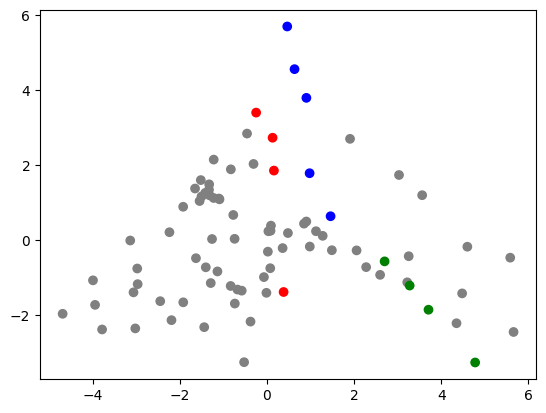

In [9]:
def get_color(row):
    if row['Alkali'] == 1:
        return 'blue'
    elif row['Alkali_Earth'] == 1:
        return 'red'
    elif row['Halogen'] == 1:
        return 'green'
    else:
        return 'gray'

# Apply the function to the dataframe to get a list of colors
colors = df.apply(get_color, axis=1)
plt.scatter(df_pca_transformed[:, 0], df_pca_transformed[:, 1], c = colors)

Now, let's look at the strucutre of the components and see what makes them special.

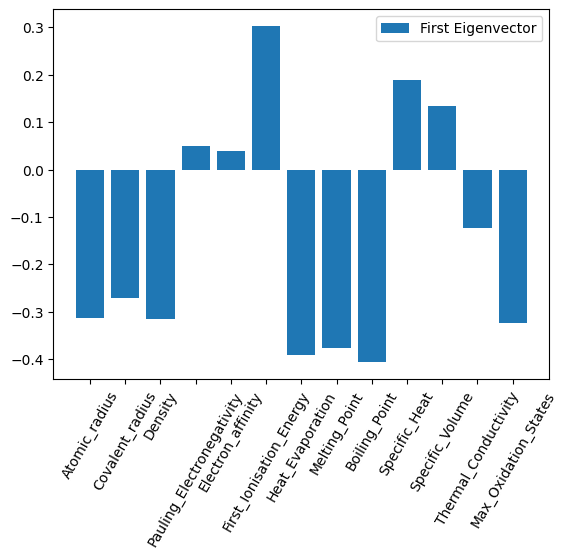

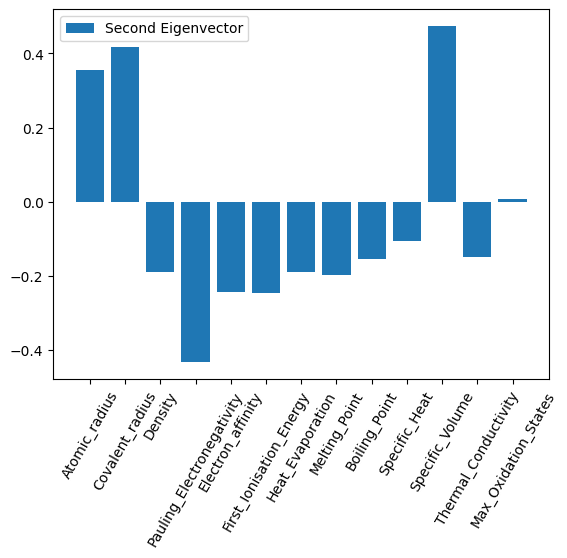

In [10]:
# prompt: Show the first and second eigenvector for PCA as vertical bar plot. Use the labels from df index

eigenvector_values = pca.components_

# Get the labels for the elements, which are the index values of the dataframe
labels = ['Atomic_radius', 'Covalent_radius','Density', 'Pauling_Electronegativity',
             'Electron_affinity', 'First_Ionisation_Energy', 'Heat_Evaporation',
             'Melting_Point', 'Boiling_Point', 'Specific_Heat', 'Specific_Volume',
             'Thermal_Conductivity', 'Max_Oxidation_States']

# Plot the first and second eigenvector as a bar plot
plt.bar(labels, eigenvector_values[0, :], label='First Eigenvector')
plt.xticks(rotation=60)
plt.legend()
plt.show()

plt.bar(labels, eigenvector_values[1, :], label='Second Eigenvector')
plt.xticks(rotation=60)
plt.legend()
plt.show()

## LDA on Elements

Now, let's run LDA on our elements. We use the DataFrame we have saved in the beginning of the Colab.

In [11]:
df2.head()

Symbol  Atomic_radius  Covalent_radius  Density  Pauling_Electronegativity  \
0      H             53               31   0.0708                       2.20   
1     He             31               28   0.1470                       0.00   
2     Li            167              128   0.5340                       0.98   
3     Be            112               96   1.8480                       1.57   
4      B             87               84   2.3400                       2.04   

   Electron_affinity  First_Ionisation_Energy  Heat_Evaporation  \
0             72.769                   1311.3             0.904   
1            -50.000                   2361.3             0.080   
2             59.632                    519.9           148.000   
3            -50.000                    898.8           309.000   
4             26.989                    800.2           504.500   

   Melting_Point  Boiling_Point  Specific_Heat  Specific_Volume  \
0          14.01         20.280         14.267             14.1   
1           0.95          4.216          5.188             31.8   
2         553.69       1118.150          3.489             13.1   
3        1551.00       3243.000          1.824              5.0   
4        2573.00       3931.000          1.025              4.6   

   Thermal_Conductivity  Max_Oxidation_States  Alkali  Alkali_Earth  Halogen  
0                0.1815                     1       0             0        0  
1                0.1520                     2       0             0        0  
2               84.8000                     1       1             0        0  
3              201.0000                     2       0             1        0  
4               27.4000                     3       0             0        0

And now we run the LDA analysis.
- Here we use the one-hot encoded vectors for the Alkali and Halogen to create class labels. Now Alkali as Class 1, Halogen as Class 2, and everything else as Class 0.
- Note that the LDA separates the Alkali and Halogen much better - compare to the PCA analysis.
- In the code below, the line 30 can be un-commented. Then you will see where the Alkali Earth metals are in this case (they were **not** a class we have trianed the LDA on).

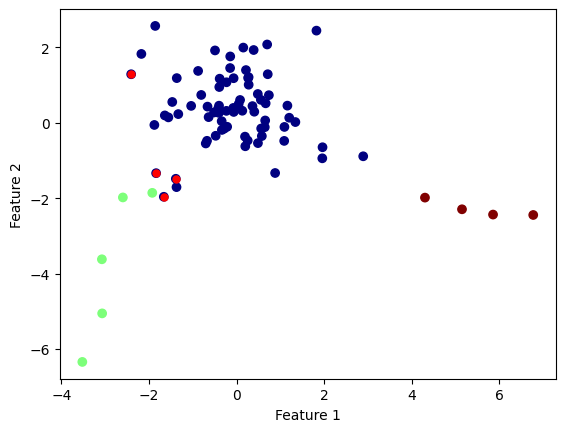

In [12]:
# Import the required libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

# Create the features and target variables
X = df2[['Atomic_radius', 'Covalent_radius','Density', 'Pauling_Electronegativity',
             'Electron_affinity', 'First_Ionisation_Energy', 'Heat_Evaporation',
             'Melting_Point', 'Boiling_Point', 'Specific_Heat', 'Specific_Volume',
             'Thermal_Conductivity', 'Max_Oxidation_States']]

y = df2['Alkali'] + 2*df2['Halogen']

# Standardize the features
X_std = StandardScaler().fit_transform(X)

# Create the local discriminant analysis model
lda = LinearDiscriminantAnalysis(n_components = 2)

# Fit the model to the data
lda.fit_transform(X_std, y)

# Predict the labels for the data
y_pred = lda.predict(X_std)
X_t = lda.fit_transform(X_std, y)

# Plot the decision boundary
plt.scatter(X_t[:, 0], X_t[:, 1], c=y, cmap = "jet")

# Show Alkali Earth
plt.scatter(X_t[df2['Alkali_Earth'] == 1, 0], X_t[df2['Alkali_Earth'] == 1, 1], c = 'red', s = 25, marker='o')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

We can also explore the outputs of the LDA model. Here, the key parameters are *coef_* and *scalings_*:

1. *coef_*:
- What it is: The coef_ attribute contains the coefficients of the linear decision boundary.
- Role in LDA: Used to make predictions.
- ize: If you're working with a binary classification problem, coef_ is a one-dimensional array. For multi-class classification, it's a 2D array, with one row for each class.
- For binary classification, the sign of the dot product of coef_ with an input feature vector determines the class of the input.
- For multi-class, the class with the highest dot product value is chosen.

2. *scalings_*:
- What it is: The scalings_ attribute contains the scaling factors (or weights) for the features used in the linear transformation to the lower-dimensional space. It is used to transform the features to the discriminant variables.
- Role in LDA: Used for dimensionality reduction and visualization.
- Size: It's a 2D array, where each column corresponds to a discriminant variable.
- scalings_ gives you the weights to combine features in order to project data into the lower-dimensional space where classes are best separated.
- Formula in Context of LDA: To obtain the lower-dimensional representation of a data point x, compute the dot product: x \cdot scalings_.

In [13]:
lda.coef_.shape

(3, 13)

In [14]:
lda.scalings_.shape

(13, 2)

Now. let's see what the basis vectors for our LDA space look like. Note that we can visualize the coefs uisng the same code - but the meaning is very different.

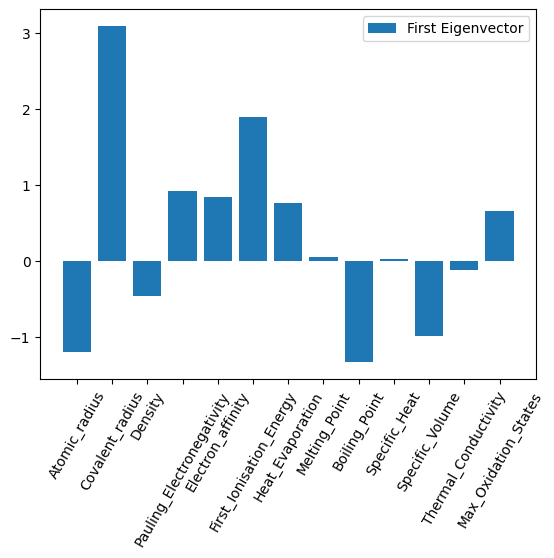

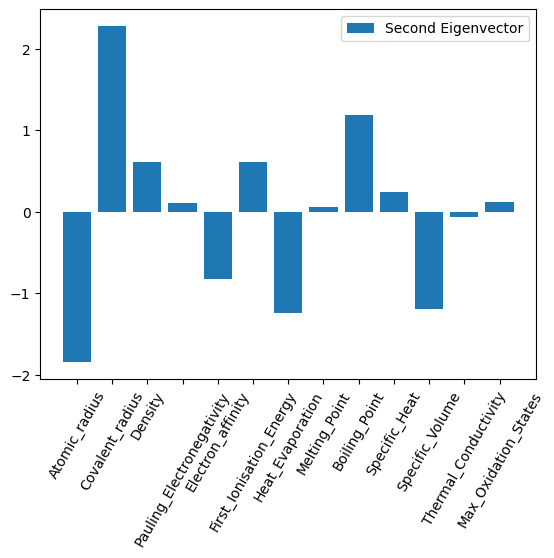

"\nplt.bar(labels, eigenvector_values[2, :], label='Second Eigenvector')\nplt.xticks(rotation=60)\nplt.legend()\nplt.show()\n"

In [15]:
eigenvector_values = lda.scalings_.T # lda.coef_

# Get the labels for the elements, which are the index values of the dataframe
labels = ['Atomic_radius', 'Covalent_radius','Density', 'Pauling_Electronegativity',
             'Electron_affinity', 'First_Ionisation_Energy', 'Heat_Evaporation',
             'Melting_Point', 'Boiling_Point', 'Specific_Heat', 'Specific_Volume',
             'Thermal_Conductivity', 'Max_Oxidation_States']

# Plot the first and second eigenvector as a bar plot
plt.bar(labels, eigenvector_values[0, :], label='First Eigenvector')
plt.xticks(rotation=60)
plt.legend()
plt.show()

plt.bar(labels, eigenvector_values[1, :], label='Second Eigenvector')
plt.xticks(rotation=60)
plt.legend()
plt.show()

'''
plt.bar(labels, eigenvector_values[2, :], label='Second Eigenvector')
plt.xticks(rotation=60)
plt.legend()
plt.show()
'''

## LDA - Iris

Now, let's expriment with the Linear Discriminant Analysis (will be very similar for Quadratic DiscriminantAnalyysis, except that decision boundaries would no longer be linear). In the code below, we:
- Load Iris data set (note that here we use all 4 dimensions for each feature!)
- Perform the LDA analysis to project 4D feature space onto the 2D space in such a way as to separate the classes best
- Visualize the data set in this new coordinate system
- Visualize the mis-classified points

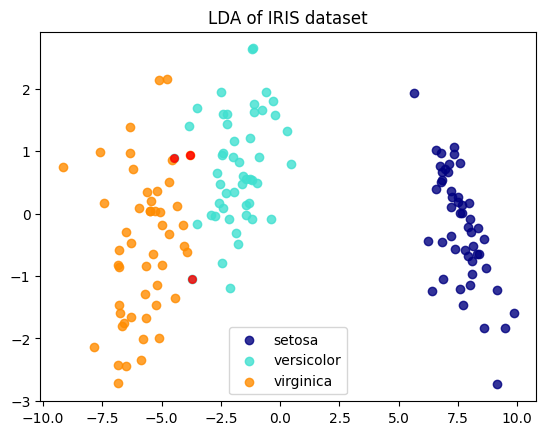

In [16]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model and transform the data to LDA coordinates
X_lda_f = lda.fit(X, y)
X_lda = X_lda_f.transform(X)

# Plotting the data in LDA coordinates
for color, i, target_name in zip(['navy', 'turquoise', 'darkorange'], [0, 1, 2], iris.target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

# Get the indices of the points that are not predicted correctly
y_pred = X_lda_f.predict(X)
incorrect_indices = np.where(y_pred != y)[0]

# Plot circles around the points that are not predicted correctly
for index in incorrect_indices:
    plt.scatter(X_lda[index, 0], X_lda[index, 1], alpha=.8, s = 30, color='red', marker='o')

# Show the plot
plt.show()

Now, LDA gives access to some interesting outputs, including decision function. Let's visualize it.

In [17]:
X_lda_f.decision_function(X).shape

(150, 3)

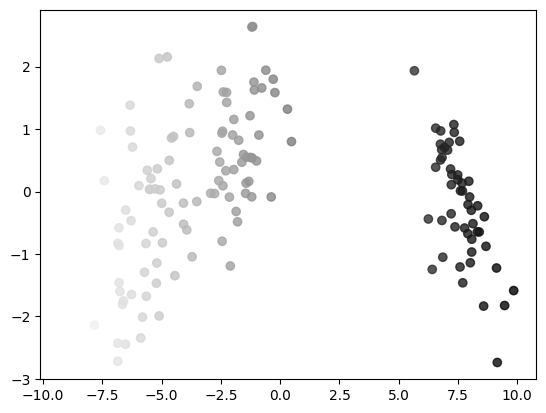

In [18]:
plt.scatter(X_lda[:, 0], X_lda[:, 1], alpha=.8, c = X_lda_f.decision_function(X)[:,2], cmap = "gray")

Another thing we can do is to experiment with visualization of the decision boundaries for LDA.
- We can either extract the parameters of the Gaussian density that it creates, or simply apply it to some probing data set.
- However, our data set is 2D. So we create a probing array of N points uniformly distributes in the 4D space of original Iris data
- And calculate Kernel Density Estimate of decision class

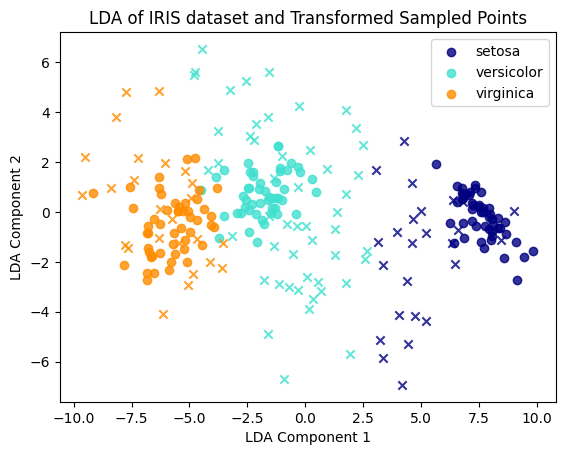

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize the LDA model
lda = LinearDiscriminantAnalysis(n_components=2)

# Fit the model
lda.fit(X, y)

# Sample points in the 4D space
n_samples = 100
X_sampled = np.random.rand(n_samples, 4) * (X.max(axis=0) - X.min(axis=0)) + X.min(axis=0)

# Transform the sampled points to the LDA components
X_sampled_lda = lda.transform(X_sampled)

# Predict the class for each sampled point
y_sampled_pred = lda.predict(X_sampled)

# Plot the LDA components of the original dataset
colors = ['navy', 'turquoise', 'darkorange']
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.8, color=color, label=target_name)

# Plot the transformed sampled points in the LDA components space with their predicted class colors
for color, i in zip(colors, [0, 1, 2]):
    plt.scatter(X_sampled_lda[y_sampled_pred == i, 0], X_sampled_lda[y_sampled_pred == i, 1], alpha=.8, color=color, marker='x')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset and Transformed Sampled Points')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'xlim', 'ylim'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'xlim', 'ylim'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'xlim', 'ylim'
  cset = contour_func(


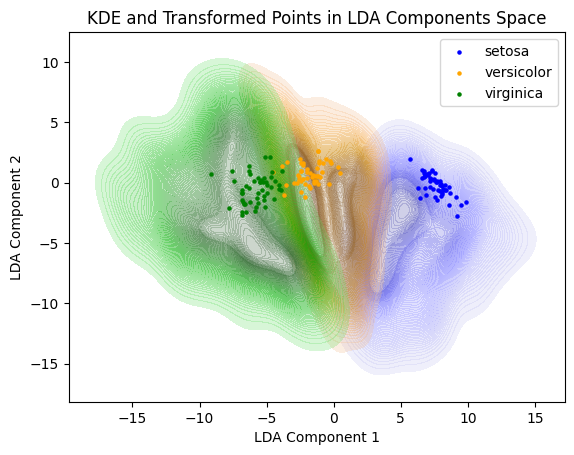

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize the LDA model
lda = LinearDiscriminantAnalysis(n_components=2)

# Fit the model
lda.fit(X, y)

# Transform the original data
X_lda = lda.transform(X)

# Sample points in the 4D space


new_min = X.min(axis=0) * 1.4
new_max = X.max(axis=0) * 1.4

# Sample points in the expanded 4D space
n_samples = 1000
X_sampled = np.random.rand(n_samples, 4) * (new_max - new_min) + new_min

'''
n_samples = 10000
X_sampled = np.random.rand(n_samples, 4) * (X.max(axis=0) - X.min(axis=0)) + X.min(axis=0)
'''

# Transform the sampled points to the LDA components
X_sampled_lda = lda.transform(X_sampled)

# Predict the class for each sampled point
y_sampled_pred = lda.predict(X_sampled)

# Determine the limits for the axes
x_min = min(X_lda[:, 0].min(), X_sampled_lda[:, 0].min())
x_max = max(X_lda[:, 0].max(), X_sampled_lda[:, 0].max())
y_min = min(X_lda[:, 1].min(), X_sampled_lda[:, 1].min())
y_max = max(X_lda[:, 1].max(), X_sampled_lda[:, 1].max())

# Plot the KDE of the transformed sampled points in the LDA components space with their predicted class colors
colors = ['blue', 'orange', 'green']
for color, i in zip(colors, [0, 1, 2]):
    sns.kdeplot(
        x=X_sampled_lda[y_sampled_pred == i, 0],
        y=X_sampled_lda[y_sampled_pred == i, 1],
        fill=True,
        color=color,
        thresh=0.01,
        levels=100,
        alpha=0.25,
        xlim=(x_min, x_max),
        ylim=(y_min, y_max)
    )

# Plot the transformed original dataset points on the KDE plot
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], color=color, label=target_name, s=5)

plt.title('KDE and Transformed Points in LDA Components Space')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend()

# Show the plot
plt.show()

# PCA on Images

Now, let's see how PCA can work on an image data set. Here, we use the most basic of the handwritten digits data sets available from scikit-learn.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [22]:
import keras
X, y = keras.datasets.mnist.load_data()[0]
X = X.reshape(60000, 784)

11490434/11490434 [==============================] - 0s 0us/step


Let's examine the shape of the data and structure of the data set. Note that for practical applications if you apply ML to your own problems, it is very convenient to strucutre the data set similarly to these examples. Then the codes can be used directly.

In [23]:
X.shape, y.shape

((60000, 784), (60000,))

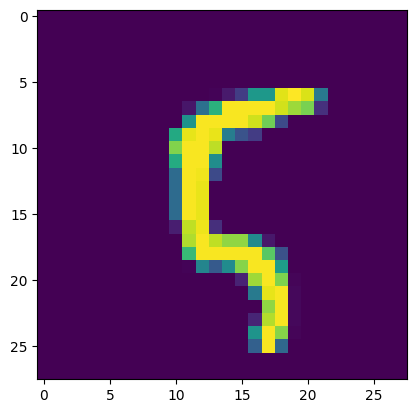

In [24]:
plt.imshow(X[100,:].reshape(28,28))

Now we perform the PCA. Experiment with anf without scaling.

In [25]:
# Standardize the features
#X = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA(n_components=10)
X_pca = pca.fit(X)

In [26]:
print(X_pca.explained_variance_ratio_)

[0.09704664 0.07095924 0.06169089 0.05389419 0.04868797 0.04312231
 0.0327193  0.02883894 0.02762028 0.0235699 ]


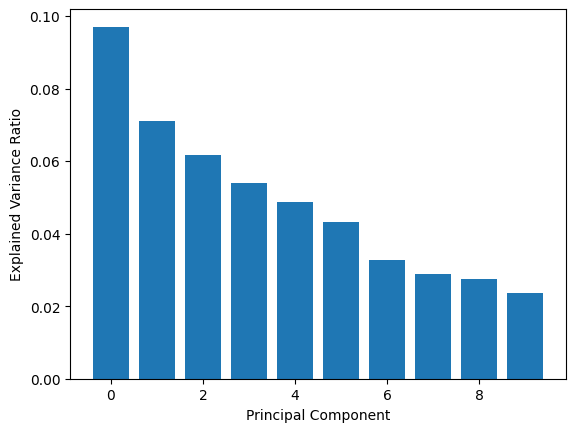

In [27]:
# prompt: bar plot of explained variance ratio'

plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()


In [28]:
X_pca.get_covariance().shape

(784, 784)

PCA scores is a very interesting object, and appears becasue scikit learn tries to use Bayesian methods to perform PCA. It allows to calculate probability of the data based on the amount of variance it explains. It is not necessary for simple applications, but allows to expand PCA for more complex applications.

In [29]:
X_pca.score_samples(X).shape

(60000,)

Now, let's transform the data and explroe components. Do not forget to .reshape(8,8) to go flom line vectors to images

In [30]:
X_t = X_pca.transform(X)
X_t.shape

(60000, 10)

In [31]:
X_pca.components_.shape

(10, 784)

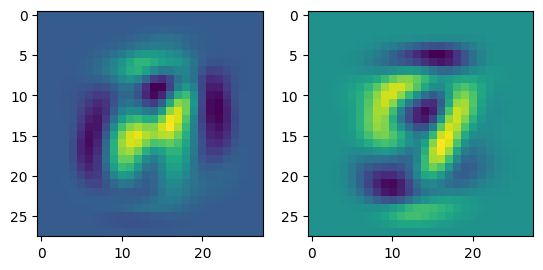

In [32]:
X_ti = X_pca.components_

fig, ax = plt.subplots(1, 2)
ax[0].imshow(X_ti[4,:].reshape(28,28))
ax[1].imshow(X_ti[1,:].reshape(28,28))
plt.show()

Now, let's look at the PCA components with ground truth labels. Note that we can see clusters!

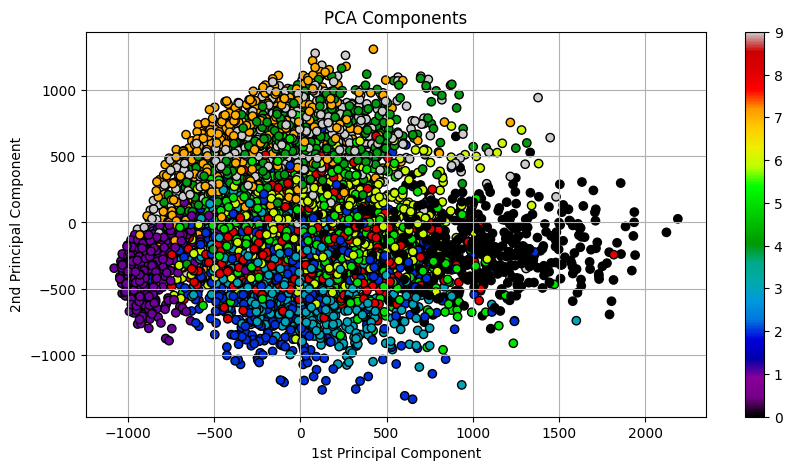

In [33]:
# Plot the PCA components
plt.figure(figsize=(10, 5))
plt.scatter(X_t[::10, 0], X_t[::10, 1], c=y[::10], cmap=plt.cm.nipy_spectral, edgecolor='k')
plt.colorbar()
plt.title("PCA Components")
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.grid(True)
plt.show()

## Clustering in reduced space

Now, let's truncate the PCA expansion to 2 components, and do k-means clustering into 10 components. We hope to separate clusters based on data only (unlike previous examples, we do not have labels for the k-means). Then we build decision surface for k-means (this is why we keep only 2 dimensions), and compare the ground truth labels and k-means classification results.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


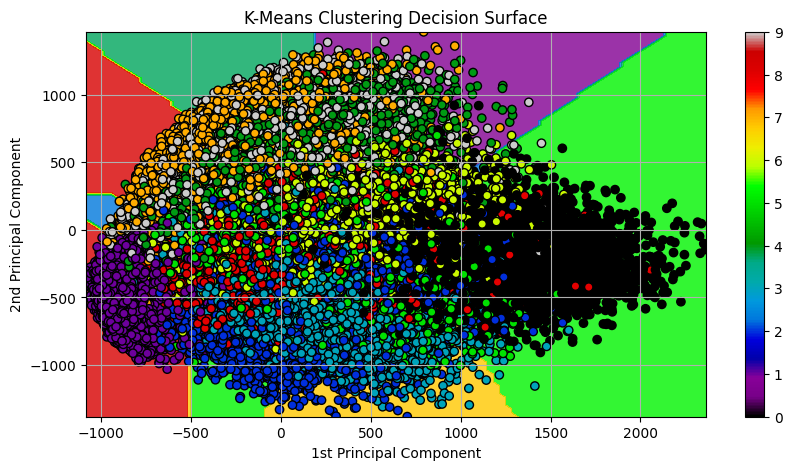

In [34]:
X_t = X_t[:,:2]

# Perform K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=0)  # Assuming 10 clusters for 10 digits
kmeans.fit(X_t)

# Plot the decision surface
plt.figure(figsize=(10, 5))
x_min, x_max = X_t[:, 0].min() - 1, X_t[:, 0].max() + 1
y_min, y_max = X_t[:, 1].min() - 1, X_t[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.nipy_spectral, alpha=0.8)
plt.scatter(X_t[:, 0], X_t[:, 1], c=y, cmap=plt.cm.nipy_spectral, edgecolor='k')
plt.colorbar()
plt.title("K-Means Clustering Decision Surface")
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.grid(True)
plt.show()

## Our first generative model

And now let's make our first generative model.
- Here we train PCA with 2 components only. These components will be the same for n = 2 or n = 10 (rememebr that PCA performs the expansion and then truncates; for other dimensionality reduction methods such as NMF it will be different).
- We then use the image above as a guide to select certain point in the PCA (latent) space.
- Then we apply inverse transform of the chosen point (that was **not** a part of original data set)
- Presto! We created a new digit which is **like** the ones before, but was not a part of the original data set.
- We still have a long road to MidJourney and DALLE2, of course....

(784,)


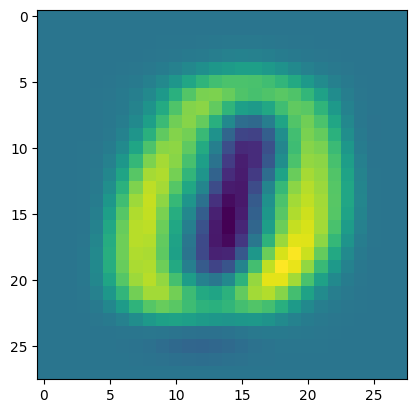

In [35]:
pca = PCA(n_components=2)
X_pca_2 = pca.fit(X)

X_rec = X_pca_2.inverse_transform((20000, 0))
print(X_rec.shape)
plt.imshow(X_rec.reshape(28,28))

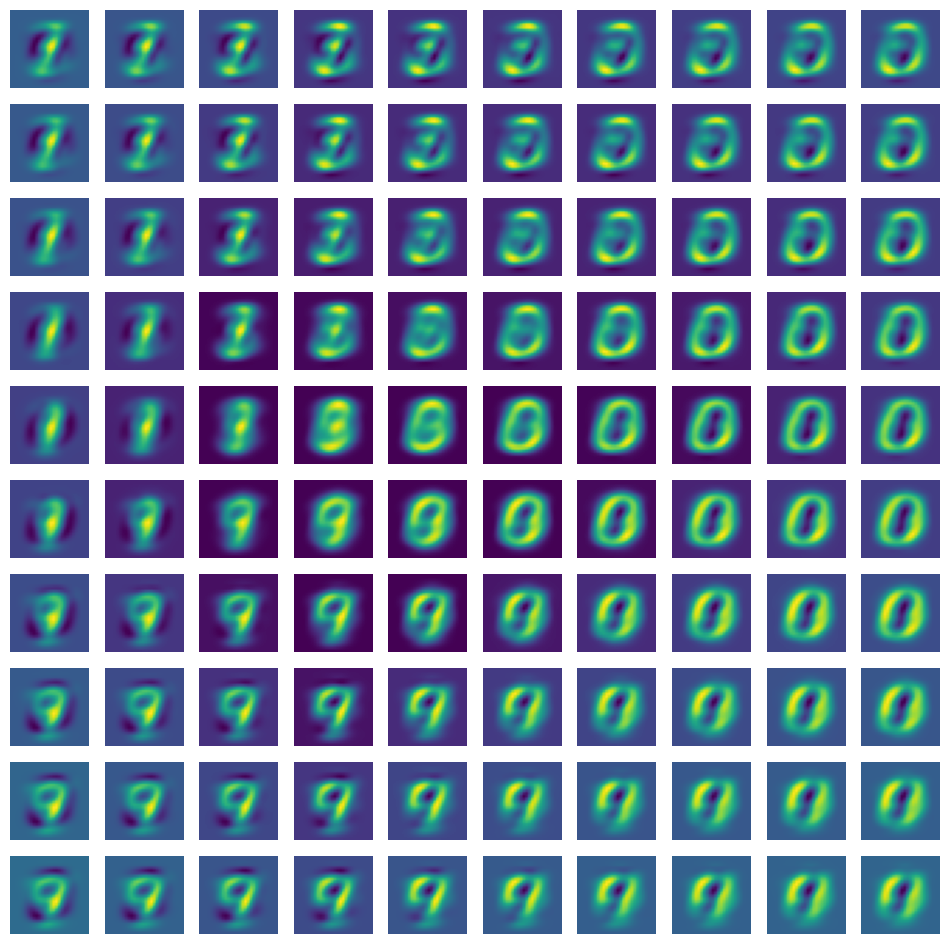

In [36]:
# prompt: sample latent space of the PCA using 10x10 grid, decode the images from the latent space, and plot them as 10x10 table

X_t = X_t[:,:2]

# Generate a grid of latent space points
x_min, x_max = X_t[:, 0].min() - 1, X_t[:, 0].max() + 1
y_min, y_max = X_t[:, 1].min() - 1, X_t[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 10), np.linspace(y_min, y_max, 10))

# Create a figure and axes object
fig, ax = plt.subplots(10, 10, squeeze = True, sharex = True, sharey = True, figsize = (12,12))

# Plot the images in the latent space
for i in range(10):
  for j in range(10):
    ax[i, j].imshow(pca.inverse_transform((xx[i, j], yy[i, j])).reshape(28,28))
    ax[i, j].set_axis_off()

# Show the figure
plt.show()

# PCA on Spectral Data

- Data by Mahshid Ahmadi and Jonghee Yang (UT Knoxville)
- Sample from Juan Pablo Correa-Baena group (GaTech)
- CL measurements by Ben Lawrie (ORNL)

In [37]:
from copy import deepcopy as dc

import numpy as np
import torch
import h5py

from scipy import ndimage
from sklearn import decomposition

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## Data download

Here we download the cathodoluminescence (https://en.wikipedia.org/wiki/Cathodoluminescence) data from several smaples of hybrid perovskites. These materials are prone to the formation of the impurity PbI2 phase that can be identified via CL emission at a speciifc wavelength.

In [38]:
# MA-free Perovskites (Cs0.17Pb0.83PbI3 = RT, 150, 200, 250 C)

!gdown https://drive.google.com/uc?id=1uCfAKlk5KTnsgNJQiiOsjdsvBx2CMzE1
!gdown https://drive.google.com/uc?id=1TTNNnmIS2b1HW8q7ywLbBRhUUBdTm1KU
!gdown https://drive.google.com/uc?id=195ih426XxtRAlidtxzSA5nIRemP3SvML
!gdown https://drive.google.com/uc?id=1cBfegFNV782WCIEKAn_hDA2RgtAJQkAx

#20220510_D17_30kx_5kV_32pA_LV_400ms_119X80_40nm_1MHz_3g_corrected #RT
#0220415_D45_30kx_5kV_32pA_LV_200ms_119X80_40nm_1_corrected #150C
#0220415_D48_30kx_5kV_32pA_LV_400ms_119X80_40nm_2_corrected #200C
#0220418_D50_30kx_5kV_32pA_LV_400ms_119X80_40nm_1MHz_8g_re_corrected #250C

Downloading...
From: https://drive.google.com/uc?id=1uCfAKlk5KTnsgNJQiiOsjdsvBx2CMzE1
To: /content/20220510_D17_30kx_5kV_32pA_LV_400ms_119X80_40nm_1MHz_3g_corrected.h5
100% 49.5M/49.5M [00:00<00:00, 55.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TTNNnmIS2b1HW8q7ywLbBRhUUBdTm1KU
To: /content/0220415_D45_30kx_5kV_32pA_LV_200ms_119X80_40nm_1_corrected.h5
100% 19.8M/19.8M [00:00<00:00, 41.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=195ih426XxtRAlidtxzSA5nIRemP3SvML
To: /content/0220415_D48_30kx_5kV_32pA_LV_400ms_119X80_40nm_2_corrected.h5
100% 19.7M/19.7M [00:00<00:00, 79.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cBfegFNV782WCIEKAn_hDA2RgtAJQkAx
To: /content/0220418_D50_30kx_5kV_32pA_LV_400ms_119X80_40nm_1MHz_8g_re_corrected.h5
100% 15.4M/15.4M [00:00<00:00, 76.8MB/s]


In [39]:
h5_f1 = h5py.File(r'/content/20220510_D17_30kx_5kV_32pA_LV_400ms_119X80_40nm_1MHz_3g_corrected.h5', 'r+')
h5_f2 = h5py.File(r'/content/0220415_D45_30kx_5kV_32pA_LV_200ms_119X80_40nm_1_corrected.h5', 'r+')
h5_f3 = h5py.File(r'/content/0220415_D48_30kx_5kV_32pA_LV_400ms_119X80_40nm_2_corrected.h5', 'r+')
h5_f4 = h5py.File(r'/content/0220418_D50_30kx_5kV_32pA_LV_400ms_119X80_40nm_1MHz_8g_re_corrected.h5', 'r+')

Let's dig into the structure of the hdf5 file a bit. Generally, these are built for specific insturment and with the strucutre general enough to accomodate all possible modalities of the specific instrument. Practically, we need to find out the element of the hdf5 file that contains the data we need - a bit like exploring the hierarchical tree of folders (its unsurprising - hdf stands for hierarchical data format)

In [40]:
print(h5_f1.keys())
print(h5_f1['Acquisition2'].keys())
print(h5_f1['Acquisition2']['ImageData'].keys())

<KeysViewHDF5 ['Acquisition0', 'Acquisition1', 'Acquisition2']>
<KeysViewHDF5 ['ImageData', 'PhysicalData', 'SVIData', 'StateEnumeration']>
<KeysViewHDF5 ['DimensionScaleC', 'DimensionScaleX', 'DimensionScaleY', 'DimensionScaleZ', 'Image', 'PrimaryGlassMediumInterfacePosition', 'SecondaryGlassMediumInterfacePosition', 'TOffset', 'XOffset', 'YOffset', 'ZOffset']>


(1, 1, 1, 3840, 5760)


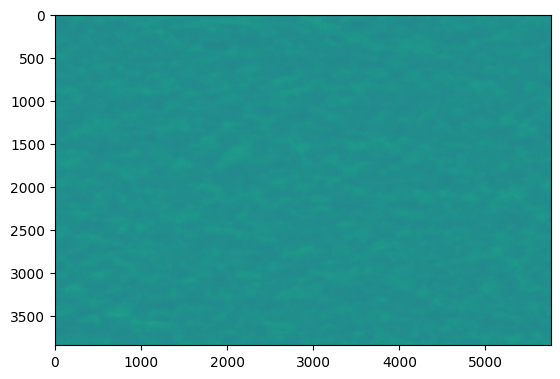

In [41]:
print(h5_f1['Acquisition0']['ImageData']['Image'].shape)
im0 = np.squeeze(h5_f1['Acquisition0']['ImageData']['Image'])
plt.imshow(im0)

(1, 1, 1, 1280, 1904)


(-0.5, 1903.5, 1279.5, -0.5)

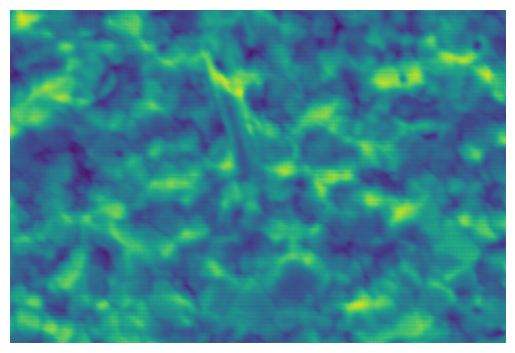

In [42]:
print(h5_f1['Acquisition1']['ImageData']['Image'].shape)
im1 = np.squeeze(h5_f1['Acquisition1']['ImageData']['Image'])
plt.imshow(im1)
plt.axis('off')

(1024, 1, 1, 80, 119)


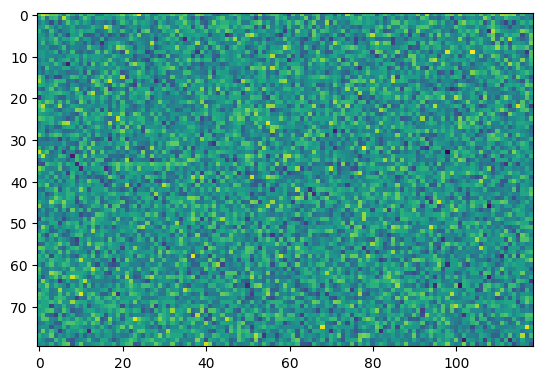

In [43]:
print(h5_f1['Acquisition2']['ImageData']['Image'].shape)
im2 = np.squeeze(h5_f1['Acquisition2']['ImageData']['Image'])
plt.imshow(im2[200,:,:])

Thsi looks like a spectral data that we need. Let's take it.

In [44]:
dataset = im2.astype(np.float64)
print(dataset.shape)
d1, d2, d3 = dataset.shape
dataset = dataset.reshape(d1, d2*d3)

(1024, 80, 119)


The sampling of the data is too large. Let's just average pool it.

In [45]:
y = torch.from_numpy(np.array(dataset.T))[:, None]
y = torch.nn.functional.avg_pool1d(y, 8, 8).squeeze().numpy()
print(y.shape)
_, s1 = y.shape

(9520, 128)


In [46]:
y = y.reshape(d2, d3, s1)
y.shape

(80, 119, 128)

In [47]:
hdata = y
hdata = hdata.astype(np.float64)

Visual inspection:

## Visual inspection

505.33000000000004 793.5844 800.4476 443.5612


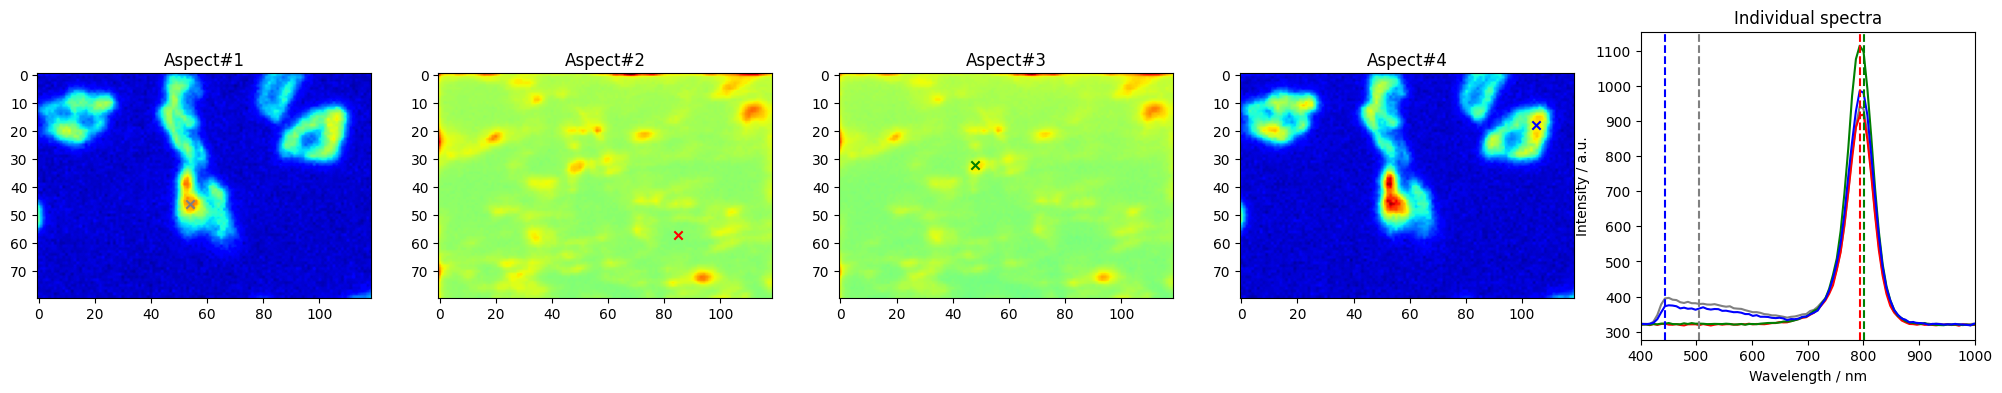

In [48]:
x=np.linspace(162.17, 1033.31, 128)
wavelength = x

# Select a slice and points for extracting idividual spectoscopic 162.17, 1033.31,1024
s1 = 50 # slice
s2 = 92 # slice
s3 = 93 # slice
s4 = 41 # slice
s5 = 50 # slice

pos1 = [54, 46] # Aspect1
pos2 = [85, 57] # Aspect2
pos3 = [48, 32] # Aspect3
pos4 = [105, 18] # Aspect4

# Plot
_, ax = plt.subplots(1, 5, figsize=(25, 4))
ax[0].imshow(hdata[..., s1], cmap='jet', origin="upper", vmin = 315, vmax = 400)
ax[0].scatter(pos1[0], pos1[1], c='gray', marker='x')
ax[1].imshow(hdata[..., s2], cmap='jet', origin="upper", vmin = 315, vmax = 1500)
ax[1].scatter(pos2[0], pos2[1], c='red', marker='x')
ax[2].imshow(hdata[..., s3], cmap='jet', origin="upper", vmin = 315, vmax = 1500)
ax[2].scatter(pos3[0], pos3[1], c='green', marker='x')
ax[3].imshow(hdata[..., s4], cmap='jet', origin="upper", vmin = 315, vmax = 400)
ax[3].scatter(pos4[0], pos4[1], c='blue', marker='x')
ax[4].plot(wavelength, hdata[pos1[1], pos1[0], :], c='gray')
ax[4].plot(wavelength, hdata[pos2[1], pos2[0], :], c='red')
ax[4].plot(wavelength, hdata[pos3[1], pos3[0], :], c='green')
ax[4].plot(wavelength, hdata[pos4[1], pos4[0], :], c='blue')
ax[4].axvline(x=s1*0.8579*8+162.17, linestyle = '--', c='gray')
ax[4].axvline(x=s2*0.8579*8+162.17, linestyle = '--', c='red')
ax[4].axvline(x=s3*0.8579*8+162.17, linestyle = '--', c='green')
ax[4].axvline(x=s4*0.8579*8+162.17, linestyle = '--', c='blue')
ax[0].set_title('Aspect#1')
ax[1].set_title('Aspect#2')
ax[2].set_title('Aspect#3')
ax[3].set_title('Aspect#4')
ax[4].set_title('Individual spectra')
ax[4].set_xlabel('Wavelength / nm')
ax[4].set_ylabel('Intensity / a.u.')
ax[4].set_xlim(400, 1000)

print(s1*0.8579*8+162.17,s2*0.8579*8+162.17,s3*0.8579*8+162.17,s4*0.8579*8+162.17)

Let's plot images so we can use them as a figure

505.33000000000004 793.5844 800.4476 443.5612 505.33000000000004


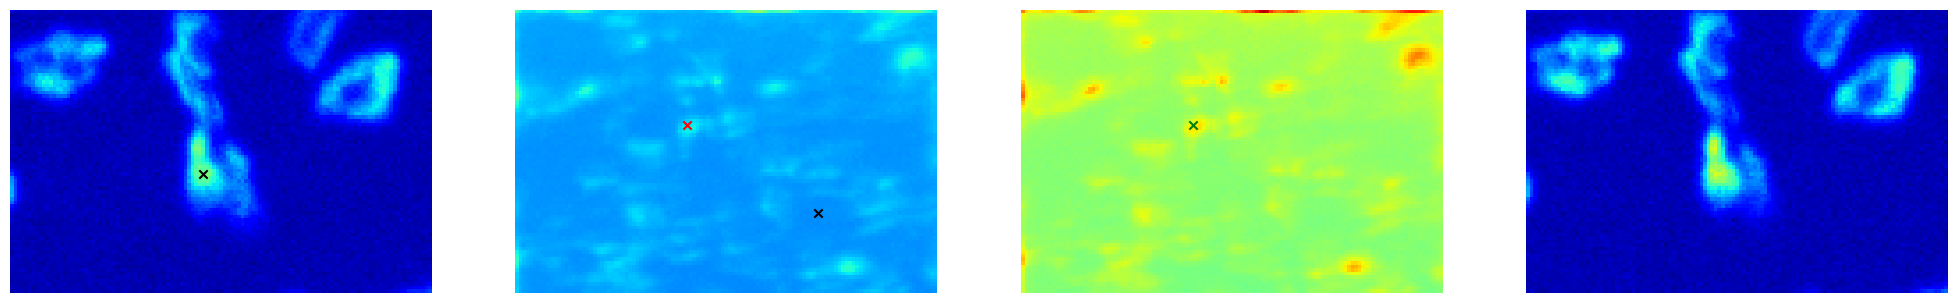

In [49]:
# Plot
_, ax = plt.subplots(1, 4, figsize=(25, 5))
ax[0].imshow(hdata[..., s1], cmap='jet', origin="upper", vmin = 315, vmax = 450)
ax[0].scatter(pos1[0], pos1[1], c='black', marker='x')
ax[1].imshow(hdata[..., s2], cmap='jet', origin="upper", vmin = 315, vmax = 2600)
ax[1].scatter(pos2[0], pos2[1], c='black', marker='x')
ax[1].scatter(pos3[0], pos3[1], c='red', marker='x')
ax[2].imshow(hdata[..., s3], cmap='jet', origin="upper", vmin = 315, vmax = 1500)
ax[2].scatter(pos3[0], pos3[1], c='green', marker='x')
ax[3].imshow(hdata[..., s4], cmap='jet', origin="upper", vmin = 315, vmax = 450)
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')
#ax[0].set_title('Aspect#1')
#ax[1].set_title('Aspect#2')
#ax[2].set_title('Aspect#3')
#ax[3].set_title('Aspect#4')

print(s1*0.8579*8+162.17,s2*0.8579*8+162.17,s3*0.8579*8+162.17,s4*0.8579*8+162.17,s5*0.8579*8+162.17)

(80, 119, 128) (80, 119)
(80, 119)
(80, 119, 128) (80, 119)
(80, 119)
(80, 119, 128) (80, 119)
(80, 119)
(80, 119, 128) (80, 119)
(80, 119)


Text(0, 0.5, 'Intensity / a.u.')

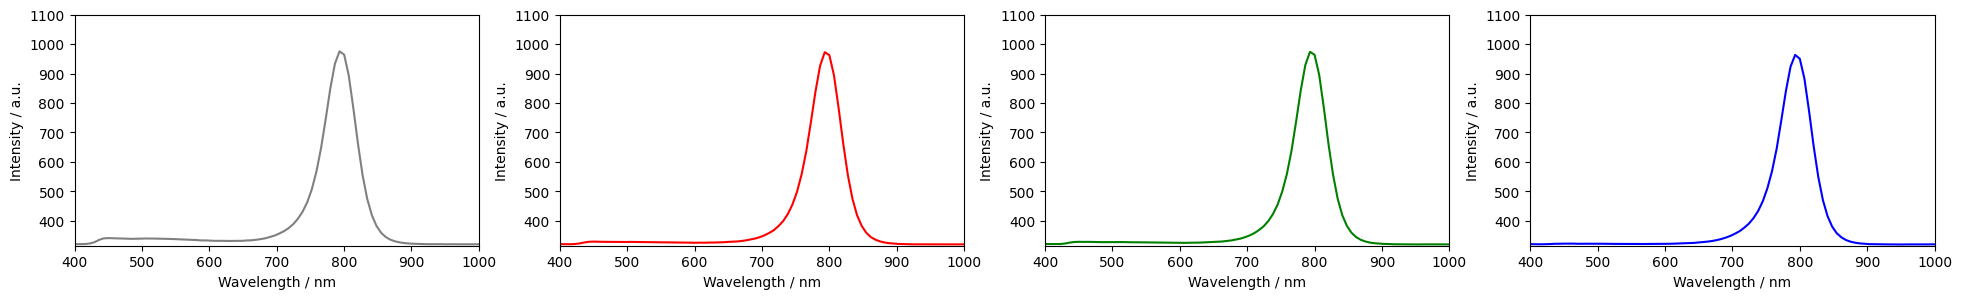

In [50]:
#Averaged spectra over each region
im_s1 = hdata[..., s1]
print(hdata.shape, im_s1.shape)
print(im_s1.shape)
av_sp1 = hdata[..., s1, :].mean(axis = 0)
im_s2 = hdata[..., s2]
print(hdata.shape, im_s2.shape)
print(im_s2.shape)
av_sp2 = hdata[..., s2, :].mean(axis = 0)
im_s3 = hdata[..., s3]
print(hdata.shape, im_s3.shape)
print(im_s3.shape)
av_sp3 = hdata[..., s3, :].mean(axis = 0)
im_s4 = hdata[..., s4]
print(hdata.shape, im_s4.shape)
print(im_s4.shape)
av_sp4 = hdata[..., s4, :].mean(axis = 0)

_, ax = plt.subplots(1, 4, figsize=(24,3))
ax[0].plot(wavelength, av_sp1, c='gray')
ax[1].plot(wavelength, av_sp2, c='red')
ax[2].plot(wavelength, av_sp3, c='green')
ax[3].plot(wavelength, av_sp4, c='blue')
ax[0].set_xlabel('Wavelength / nm')
ax[0].set_ylabel('Intensity / a.u.')
ax[0].set_xlim(400,1000)
ax[1].set_xlim(400,1000)
ax[2].set_xlim(400,1000)
ax[3].set_xlim(400,1000)
ax[0].set_ylim(315,1100)
ax[1].set_ylim(315,1100)
ax[2].set_ylim(315,1100)
ax[3].set_ylim(315,1100)
ax[1].set_xlabel('Wavelength / nm')
ax[1].set_ylabel('Intensity / a.u.')
ax[2].set_xlabel('Wavelength / nm')
ax[2].set_ylabel('Intensity / a.u.')
ax[3].set_xlabel('Wavelength / nm')
ax[3].set_ylabel('Intensity / a.u.')

(315.0, 1200.0)

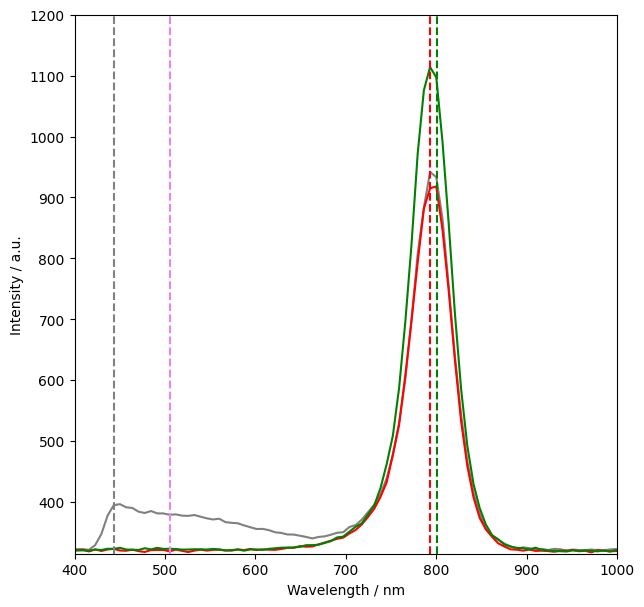

In [51]:
plt.figure(figsize=(7,7))
plt.plot(wavelength, hdata[pos1[1], pos1[0], :], c='gray')
plt.plot(wavelength, hdata[pos2[1], pos2[0], :], c='red')
plt.plot(wavelength, hdata[pos3[1], pos3[0], :], c='green')

plt.axvline(x=s4*0.8579*8+162.17, linestyle = '--', c='gray')
plt.axvline(x=s2*0.8579*8+162.17, linestyle = '--', c='red')
plt.axvline(x=s3*0.8579*8+162.17, linestyle = '--', c='green')

plt.axvline(x=s5*0.8579*8+162.17, linestyle = '--', c='violet')
plt.xlabel('Wavelength / nm')
plt.ylabel('Intensity / a.u.')
plt.xlim(400, 1000)
plt.ylim(315, 1200)

- Here, we can see that we have a strong peak at around 800 nm. The position of this peak and its height/width can change a bit. We also see that some of the locations have a pre-peak at the 450-600 nm. Less obvious is that the main peak can also have a shoulder.

- The great thing about the CL data is that it is with a very good approximation linear - the signal from multiple phases is a sum of signals from individual phases

- And finally CL signal from pure material will have a nice Lorenzian peak shape (can become Gaussian if there is some dosprder) - so we can expect shape of the peaks to be meaningful as well

- So for this system, we can expect that both ML analysis using linear methods and physics-based analysis will be useful.

- Let's try both!

## PCA and NMF

First, we start with exploratory data analysis using PCA and NMF (https://en.wikipedia.org/wiki/Non-negative_matrix_factorization).

- Remember that PCA components are orthogonal, and we use truncation to select desired number of components

- NMF components are positively-defined, and we need to choose how many NMF components to use.

In [52]:
X_vec = hdata.copy()
d1, d2, d3 = X_vec.shape
X_vec = X_vec.reshape(d1*d2, d3)
X_vec = (X_vec - np.min(X_vec)) / np.ptp(X_vec)

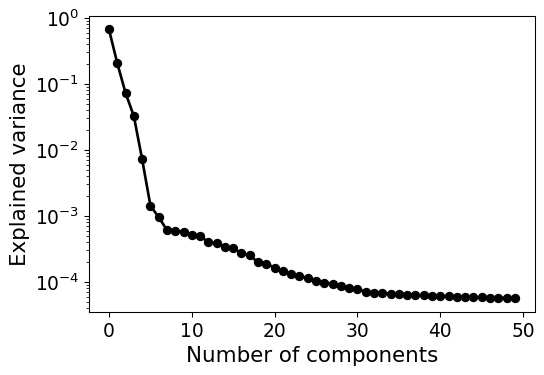

In [53]:
pca = decomposition.PCA()
pca.fit(X_vec)
plt.figure(figsize=(6, 4), dpi = 96)
plt.plot(pca.explained_variance_ratio_[0:50], '-o', linewidth=2, c = 'black')
plt.xlabel('Number of components', fontsize = 16)
plt.ylabel('Explained variance', fontsize = 16)

plt.tick_params(labelsize = 14)
plt.yscale('log')

In [54]:
# Select number of components
nc = 5

# Select decomposition type ('PCA' or 'NMF')
decomposition_type = 'PCA'

# Run decomposition
if decomposition_type == 'NMF':
    clf = decomposition.NMF(n_components=nc, random_state=42)
elif decomposition_type == 'PCA':
    clf = decomposition.PCA(n_components=nc, random_state=42)
else:
    raise NotImplementedError('Available methods: "PCA", "NMF"')
X_vec_t = clf.fit_transform(X_vec)
components = clf.components_
components = components.reshape(nc, d3)
print(components.shape, X_vec_t.shape)

(5, 128) (9520, 5)


NUMBER OF COMPONENTS: 5
Components...


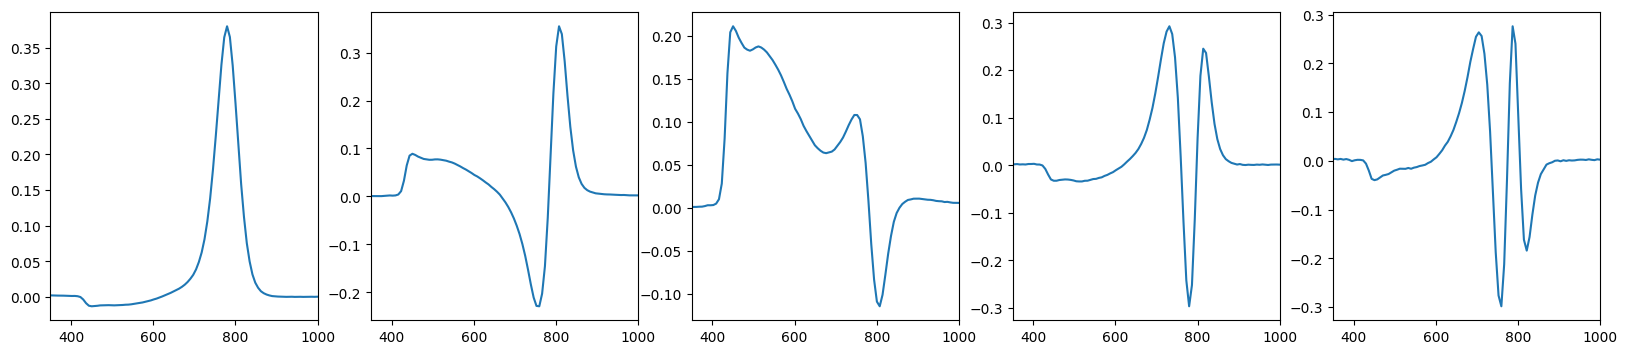

Abundance maps...


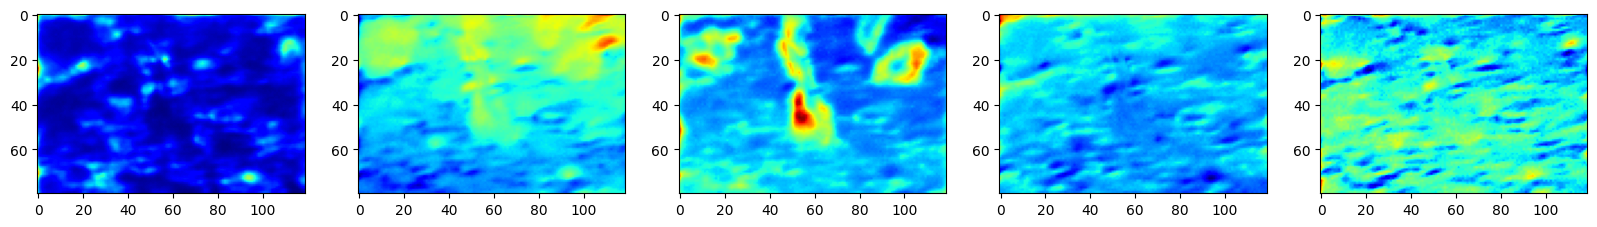

In [55]:
rows = int(np.ceil(float(nc)/5))
cols = int(np.ceil(float(nc)/rows))

print('NUMBER OF COMPONENTS: ' + str(nc))
print('Components...')
gs1 = gridspec.GridSpec(rows, cols)
fig1 = plt.figure(figsize = (4*cols, 3.5*(1+rows)//1.5))
for i in range(nc):
    ax1 = fig1.add_subplot(gs1[i])
    ax1.plot(wavelength, components[i])
    #ax1.set_title('Component ' + str(i + 1))
    ax1.set_xlim(350,1000)
plt.show()

print('Abundance maps...')
gs2 = gridspec.GridSpec(rows, cols)
fig2 = plt.figure(figsize = (4*cols, 4*(1+rows//1.5)))
for i in range(nc):
    ax2 = fig2.add_subplot(gs2[i])
    ax2.imshow(X_vec_t[:, i].reshape(d1, d2), cmap = 'jet')
    #ax2.set_title('Component ' + str(i + 1))
plt.show()

Looks like we have quite rich structure in this material!
- Experiment witht he number of the PCA and NMF components
- What do you see?
- ANy guesses how we can (qualitativley) interpret them in terms of peak positions, shifts, etc?

## Masking and analysis

We can use the PCA and NMF maps to build masks that select the regions we *think* is interetsing, and average the spectra from these regions.

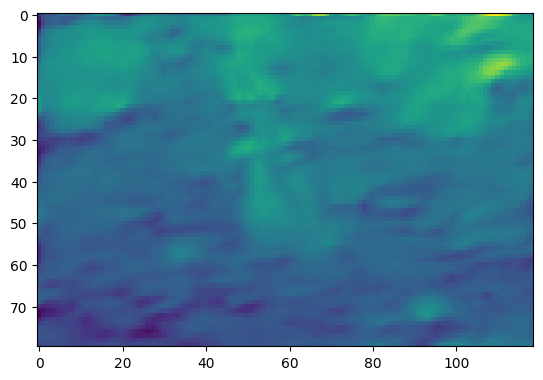

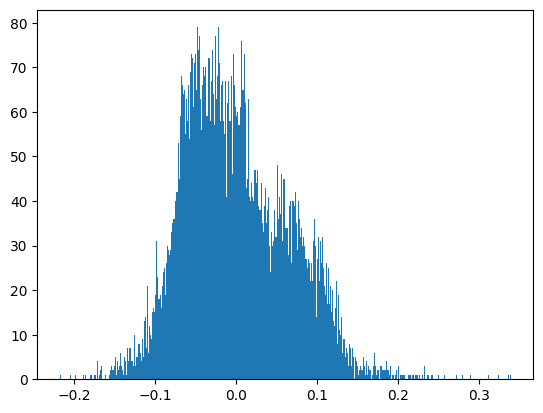

In [56]:
# Choose the image:
im_an = X_vec_t[:, 1].reshape(d1, d2)
plt.imshow(im_an)
plt.show()

# Make histogram to choose offsets
plt.hist(im_an.flatten(), bins = 500)
plt.show()

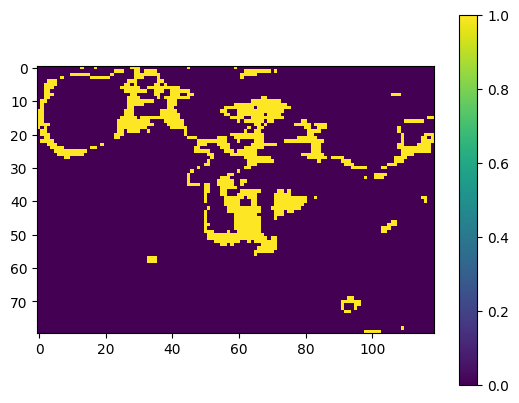

In [57]:
# Select offsets manually
# Play with the logic (i.e. > and <)
off1, off2 = 0.02, 0.05
im_cut = (im_an > off1) & (im_an < off2)

# And check binary mask (ones and zeros)
plt.imshow(im_cut)
plt.colorbar()
plt.show()

(80, 119, 128) (80, 119)
(1018, 128)


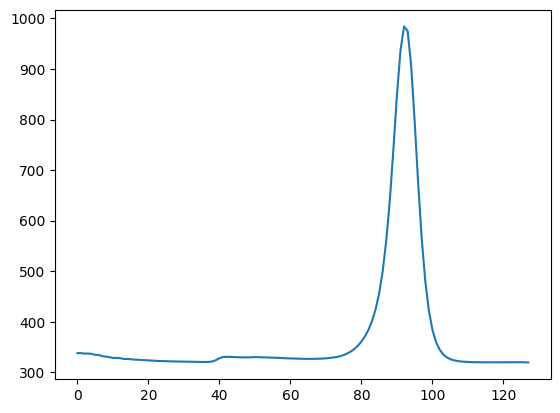

In [58]:
# We use indexing to average spectra
# Only within yellow regions

print(hdata.shape, im_cut.shape)
print(hdata[im_cut, :].shape)
av_spec = hdata[im_cut, :].mean(axis = 0)
plt.plot(av_spec)

In [59]:
im_cut.sum()

1018

## Supervised regression

- The simplest example of the supervised analysis method is supervised linear regression. Here, we try to represent the spectrum at each location as a linear ocmbination of example spectra.
- Here, we are going to choose the "known" locations on the PCA maps to produce these endmember spectra.

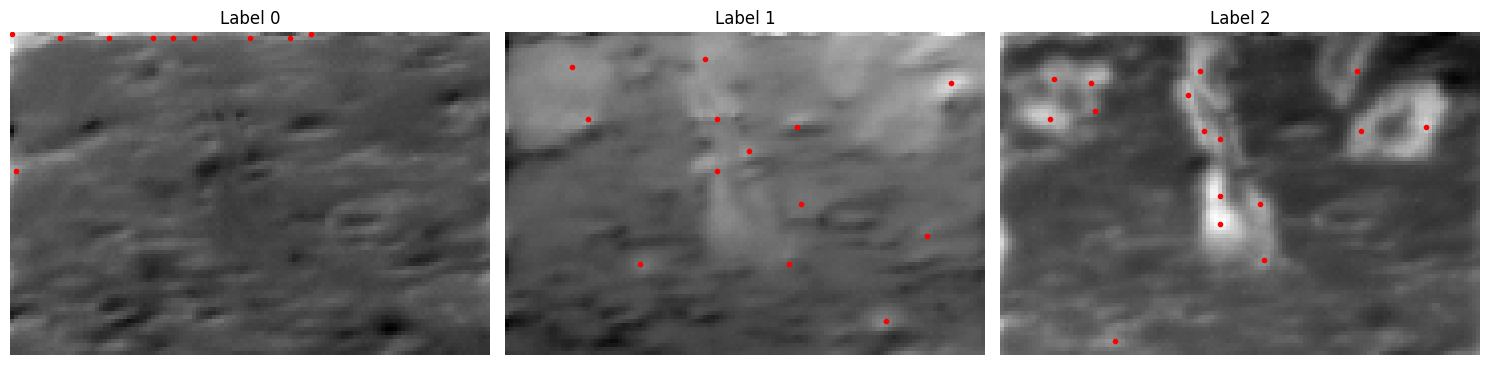

(10, 128) (13, 128) (16, 128)


In [60]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

train_data = hdata
X_train = np.array(train_data)

im0 = X_vec_t[:, 3].reshape(d1, d2)
image_max0 = ndi.maximum_filter(im0, size=2, mode='constant')
coordinates0 = peak_local_max(image_max0, min_distance=3, threshold_abs = 0.08, exclude_border = False)
label0 = np.array([X_train.reshape(d1,d2,d3)[i,j,:] for i,j in coordinates0])

im1 = X_vec_t[:, 1].reshape(d1, d2)
image_max1 = ndi.maximum_filter(im1, size=4, mode='constant')
coordinates1 = peak_local_max(image_max1, min_distance=6, threshold_abs = 0.0025, exclude_border = True)
label1 = np.array([X_train.reshape(d1,d2,d3)[i,j,:] for i,j in coordinates1])

im2 = X_vec_t[:, 2].reshape(d1, d2)
image_max2 = ndi.maximum_filter(im2, size=2, mode='constant')
coordinates2 = peak_local_max(image_max2, threshold_abs = 0.05, min_distance=3)
label2 = np.array([X_train.reshape(d1,d2,d3)[i,j,:] for i,j in coordinates2])

# display results
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)

ax = axes.ravel()
ax[0].imshow(im0, cmap=plt.cm.gray)
ax[0].plot(coordinates0[:, 1], coordinates0[:, 0], 'r.')
ax[0].axis('off')
ax[0].set_title('Label 0')

ax[1].imshow(im1, cmap=plt.cm.gray)
ax[1].plot(coordinates1[:, 1], coordinates1[:, 0], 'r.')
ax[1].axis('off')
ax[1].set_title('Label 1')

ax[2].imshow(im2, cmap=plt.cm.gray)
ax[2].plot(coordinates2[:, 1], coordinates2[:, 0], 'r.')
ax[2].axis('off')
ax[2].set_title('Label 2')

fig.tight_layout()

plt.show()

print(label0.shape, label1.shape, label2.shape)

In [61]:
imstack_train_s = np.concatenate((label0, label1, label2))

labels_train_s = np.concatenate((np.zeros(len(label0)),
                                 np.zeros(len(label1))+1,
                                 np.zeros(len(label2))+2))

print(imstack_train_s.shape, labels_train_s.shape)

(39, 128) (39,)


Supervised regression is exactly what it souds like. Since we have already created examples of classes for the ss-VAE, we can see if the linear model works. Generally for many data set, it does work very well (since image formation mechanisms is linear). Caveat of course is that you have to know all examples.  

Text(0.5, 1.0, 'Label surface')

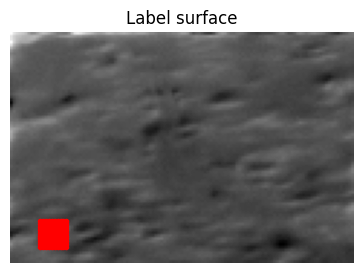

In [62]:
coordinates_surf = np.array([[i+65,j+10] for i in range(10) for j in range(10)])

plt.figure(figsize=(8, 3))
plt.imshow(im0, cmap=plt.cm.gray)
plt.plot(coordinates_surf[:, 1], coordinates_surf[:, 0], 'r.')
plt.axis('off')
plt.title('Label surface')

(80, 119, 128)


(400.0, 1000.0)

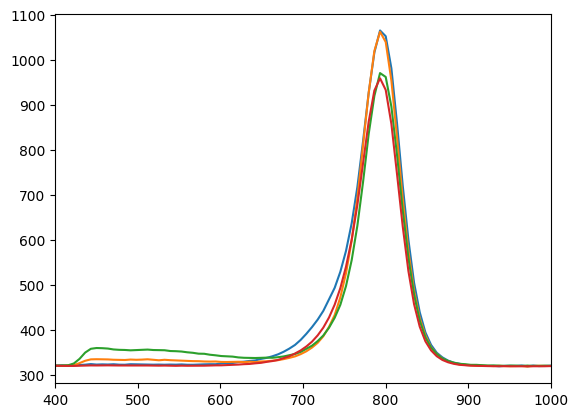

In [63]:
X_vec2 = hdata.reshape(d1, d2, d3)
print(X_vec2.shape)

surf = np.array([X_vec2[i,j,:] for i,j in coordinates_surf]).mean(axis = 0)
defect0 = np.array([X_vec2[i,j,:] for i,j in coordinates0]).mean(axis = 0)
defect1 = np.array([X_vec2[i,j,:] for i,j in coordinates1]).mean(axis = 0)
defect2 = np.array([X_vec2[i,j,:] for i,j in coordinates2]).mean(axis = 0)

plt.plot(wavelength, defect0)
plt.plot(wavelength, defect1)
plt.plot(wavelength, defect2)
plt.plot(wavelength, surf)
plt.xlim(400,1000)

This is how we implement supervised regression

In [64]:
from scipy.optimize import curve_fit
import scipy

def fn(x, a, b, c, d):
    return a*defect0 + b*defect1 + c*defect2 + d*surf

X_vec2 = X_vec2.reshape(d1*d2, d3)
ans_arr = []

for i, Xv in enumerate(X_vec2):
  popt, pcov = curve_fit(fn, np.arange(101), Xv)
  ans_arr.append(popt)

(9520, 4)


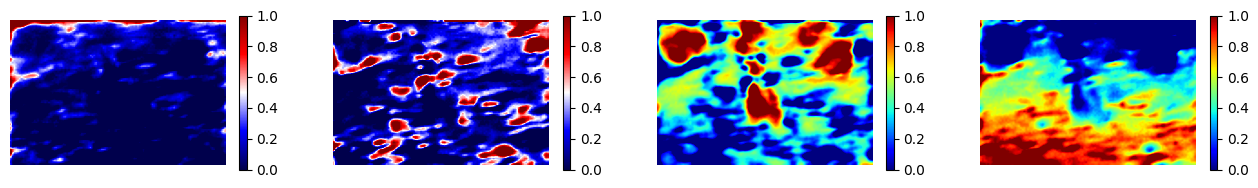

In [65]:
ans_arr = np.array(ans_arr)
print(ans_arr.shape)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4), dpi=100)

im1 = ax1.imshow(ans_arr.reshape(d1,d2,4)[:,:,0], cmap='seismic', vmin = 0, vmax = 1)
ax1.axis(False)
cbar1 = fig.colorbar(im1, ax=ax1, shrink=.5)

im2 = ax2.imshow(ans_arr.reshape(d1,d2,4)[:,:,1], cmap='seismic', vmin = 0, vmax = 1)
ax2.axis(False)
cbar2 = fig.colorbar(im2, ax=ax2, shrink=.5)

im3 = ax3.imshow(ans_arr.reshape(d1,d2,4)[:,:,2], cmap='jet', interpolation='gaussian', vmin = 0, vmax = 1)
ax3.axis(False)
cbar3 = fig.colorbar(im3, ax=ax3, shrink=.5)

im4 = ax4.imshow(ans_arr.reshape(d1,d2,4)[:,:,3], cmap='jet', interpolation='gaussian', vmin = 0, vmax = 1)
ax4.axis(False)
cbar4 = fig.colorbar(im4, ax=ax4, shrink=.5)

plt.show()

And we can present results as an RGB image (note which components we have used as RGB channels)

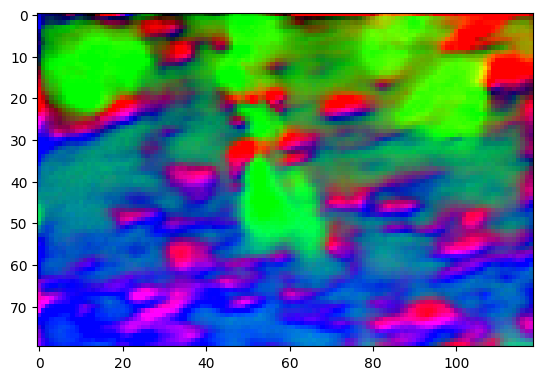

In [66]:
plt.imshow(ans_arr.reshape(d1,d2,4)[:,:,1:])

## LMFit

We can also use LMFit to fit our data using the set of Gaussian peaks.

In [67]:
! pip install lmfit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.3 MB/s eta 0:00:00


In [68]:
from lmfit.models import GaussianModel, ExponentialModel, ConstantModel

In [69]:
print(hdata.shape,wavelength.shape)
print(hdata.min(), hdata.max())

(80, 119, 128) (128,)
313.0 1514.75


-	An unknown asymmetric band with a peak position of 443(±10) nm
-	PbI2 peak: 505 (±7) nm
-	Perovskite peak: 745(±10) nm (Br-I mixed system), 787 (±10) nm (I-only system)


In [70]:
# Let's make it a function

def Gauss5Fit(x, y, if_plt):

  #Let's define search interval
  delta = 30
  cent1 = 443 #430
  cent2 = 505 #500
  cent3 = 550 #620
  cent4 = 720 #650
  cent5 = 800 #780

  const_mod = ConstantModel(prefix='const_')
  pars = const_mod.guess(y, x=x)
  # pars['const_c'].set(0.01, min=0, max = 0.02)

  gauss1  = GaussianModel(prefix='g1_')
  pars.update( gauss1.make_params())
  pars['g1_center'].set(cent1, min=cent1-delta, max=cent1+delta)
  pars['g1_sigma'].set(5, min=3, max = 50)
  pars['g1_amplitude'].set(2, min=0.01, max = 3000)

  gauss2  = GaussianModel(prefix='g2_')
  pars.update(gauss2.make_params())
  pars['g2_center'].set(cent2, min=cent2-delta, max=cent2+delta)
  pars['g2_sigma'].set(5, min=3, max = 40)
  pars['g2_amplitude'].set(2, min=0.01, max = 3000)

  gauss3  = GaussianModel(prefix='g3_')
  pars.update(gauss3.make_params())
  pars['g3_center'].set(cent3, min=cent3-2*delta, max=cent3+2*delta)
  pars['g3_sigma'].set(5, min=3, max = 80)
  pars['g3_amplitude'].set(2, min=0.01, max = 3000)

  gauss4  = GaussianModel(prefix='g4_')
  pars.update(gauss4.make_params())
  pars['g4_center'].set(cent4, min=cent4-3*delta, max=cent4+1*delta)
  pars['g4_sigma'].set(5, min=3, max = 70)
  pars['g4_amplitude'].set(2, min=0.01, max = 3000)

  gauss5  = GaussianModel(prefix='g5_')
  pars.update(gauss5.make_params())
  pars['g5_center'].set(cent5, min=cent5-1*delta, max=cent5+1*delta)
  pars['g5_sigma'].set(5, min=3, max = 45)
  pars['g5_amplitude'].set(2, min=1, max = 3000)

  mod2 = const_mod + gauss1 + gauss2 + gauss3 + gauss4 + gauss5
  init = mod2.eval(pars, x=x)
  out = mod2.fit(y, pars, x=x, method = 'slsqp') #method = 'slsqp' nelder
  #print(out.fit_report(min_correl=0.1))
  if if_plt:
    plt.plot(x, y)
    plt.plot(x, init, 'k--')
    plt.plot(x, out.best_fit, 'r-')
    plt.show()

  return out.values

Let's see how the fitted data at one location looks like

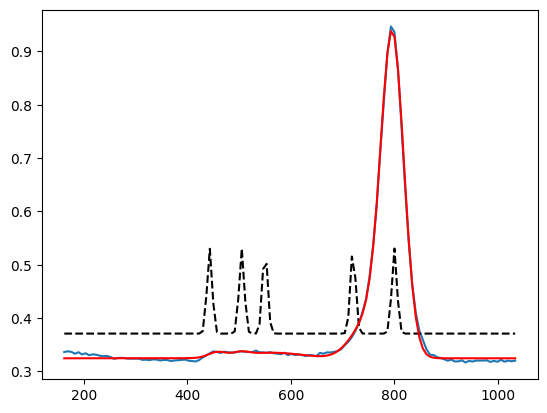

{'const_c': 0.3244872433969894,
 'g1_amplitude': 0.42754617752879526,
 'g1_center': 457.63557082689846,
 'g1_sigma': 16.950021522098503,
 'g1_fwhm': 39.914249680668,
 'g1_height': 0.010062893147195773,
 'g2_amplitude': 0.26352246514534644,
 'g2_center': 503.3147264370934,
 'g2_sigma': 15.67270147898993,
 'g2_fwhm': 36.90639089675507,
 'g2_height': 0.006707858149897573,
 'g3_amplitude': 1.5455563585011696,
 'g3_center': 563.3201631827225,
 'g3_sigma': 58.550603819160415,
 'g3_fwhm': 137.87613288543534,
 'g3_height': 0.01053085311202727,
 'g4_amplitude': 5.4352280455937185,
 'g4_center': 749.4961705166711,
 'g4_sigma': 32.12149576544259,
 'g4_fwhm': 75.64034065837951,
 'g4_height': 0.06750440245271642,
 'g5_amplitude': 32.99179430114397,
 'g5_center': 796.2517638332166,
 'g5_sigma': 22.21642599942298,
 'g5_fwhm': 52.315684271961224,
 'g5_height': 0.5924365287183058}

In [71]:
dat = hdata[50, 68, :]/1000 #10, 38
y = dat
x = wavelength

Gauss5Fit(x,y, True)

Let's look at several cross-sections

(80, 119, 128)


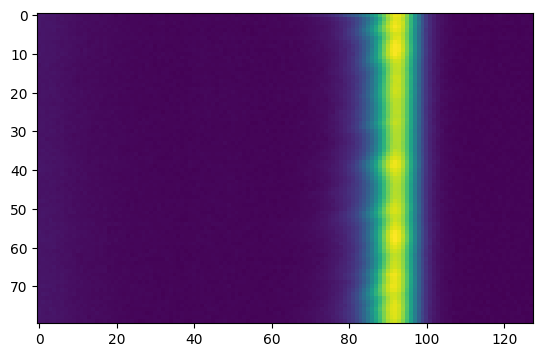

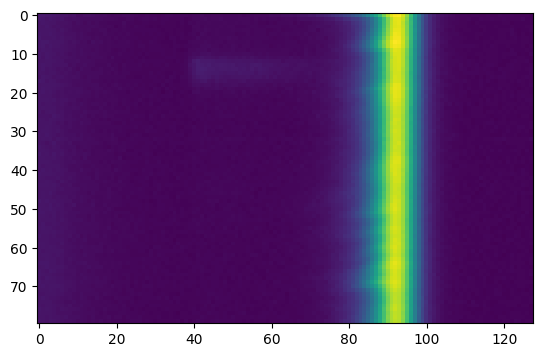

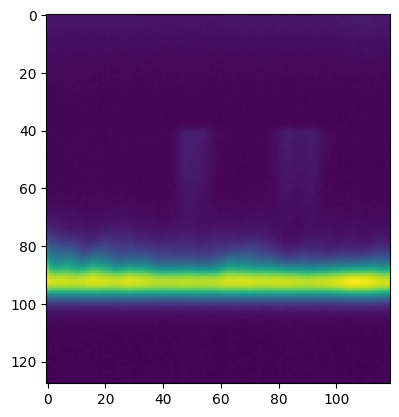

In [72]:
print(hdata.shape)

plt.imshow(np.log(hdata[:,33,:]))
plt.show()

plt.imshow(np.log(hdata[:,43,:]))
plt.show()

plt.imshow(np.log(hdata[1,:,:].T))
plt.show()

And fit all data (here we decimate it by factor of 5 - if you make step 1 or 2, you will have more points but code will take an hour to run).

0


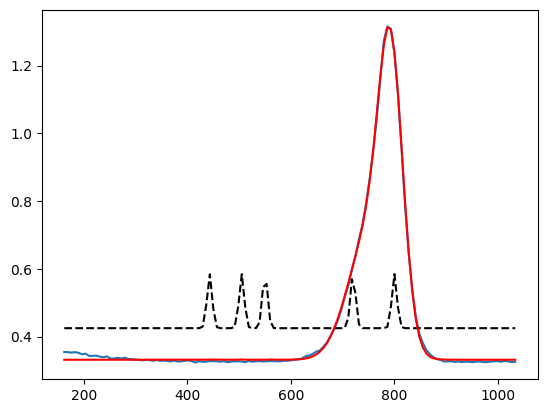

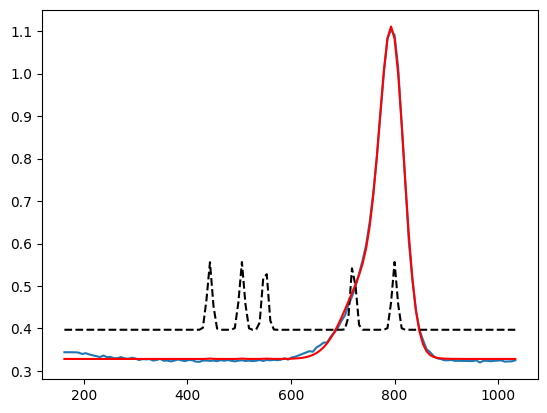

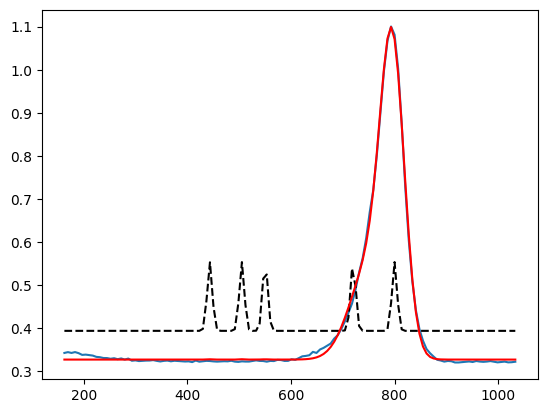

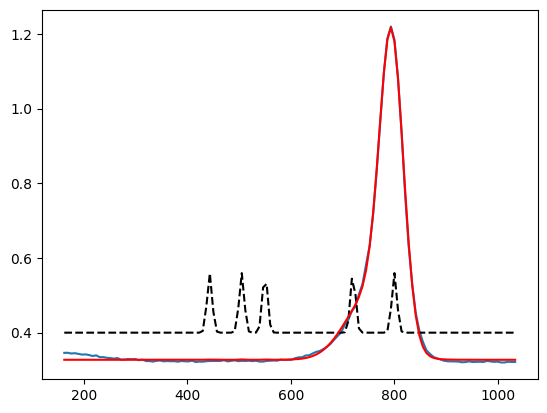

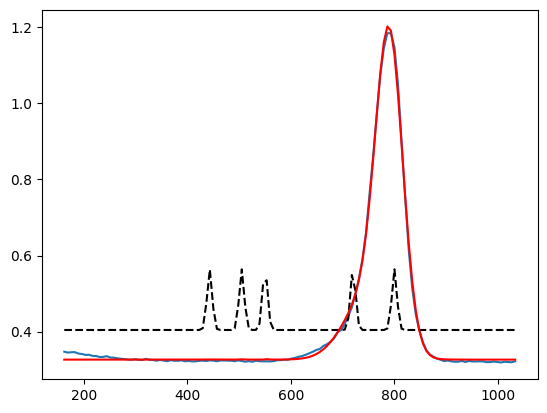

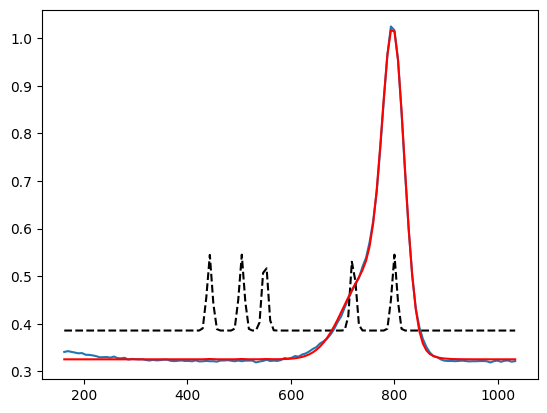

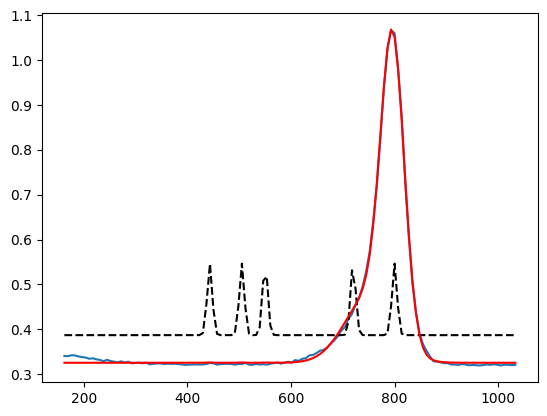

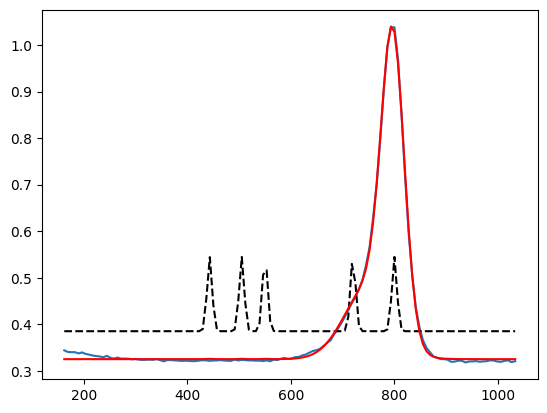

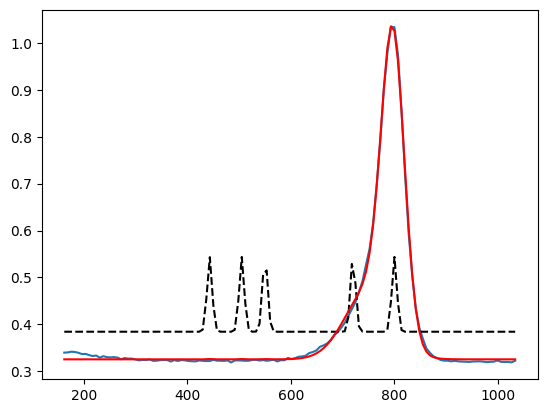

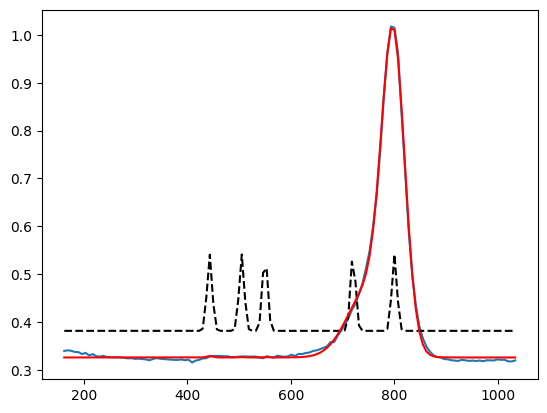

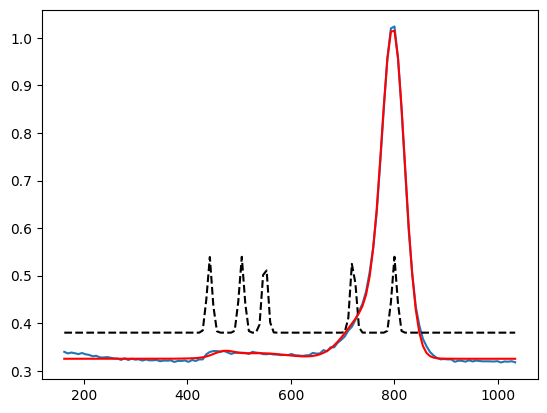

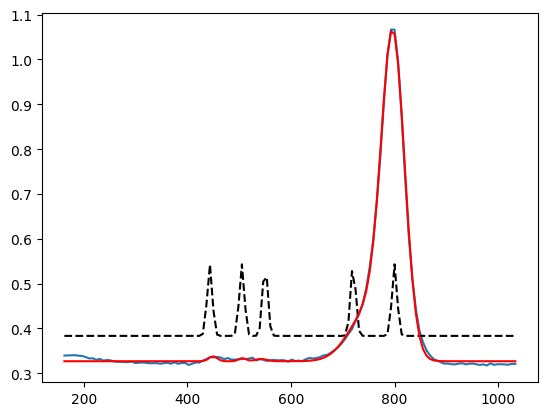

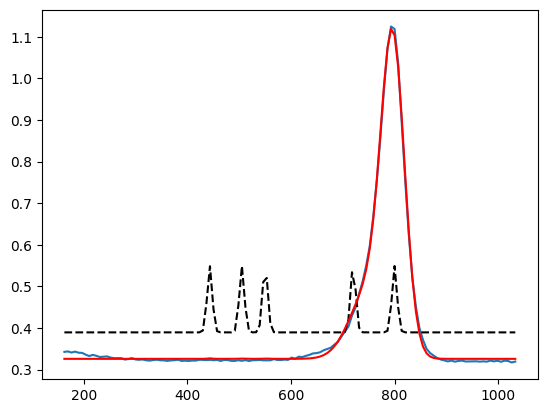

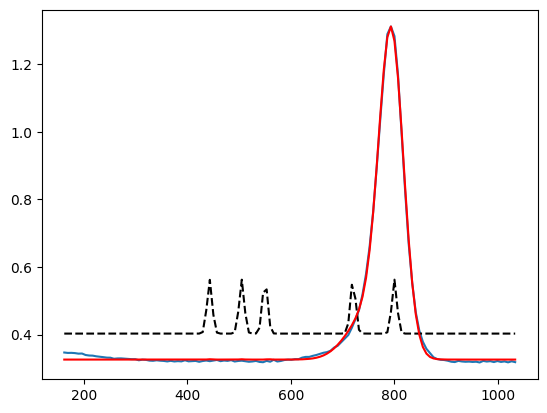

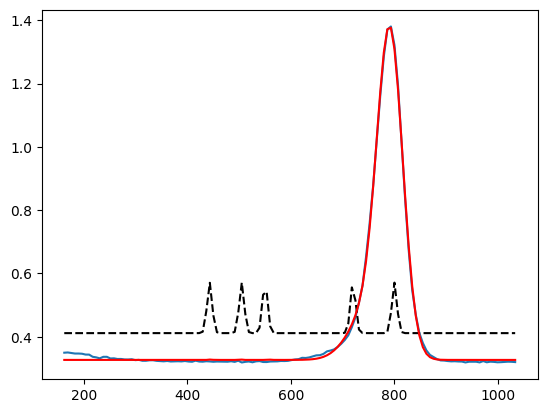

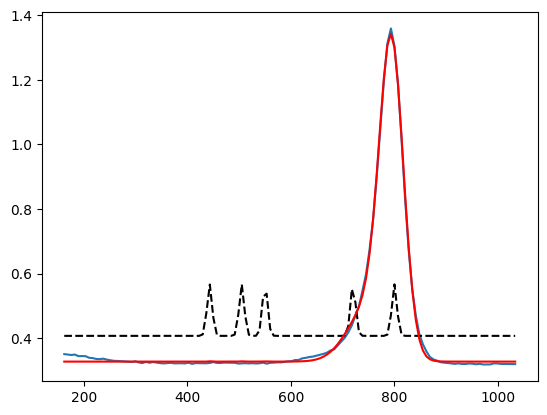

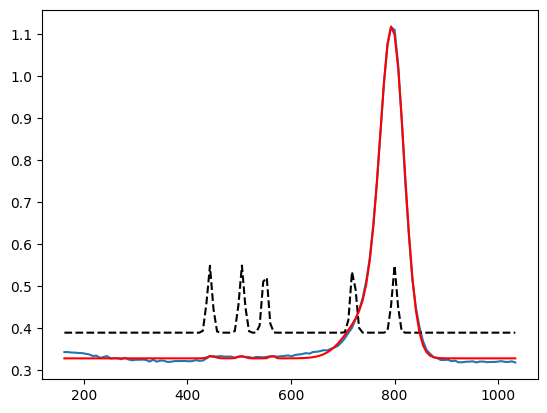

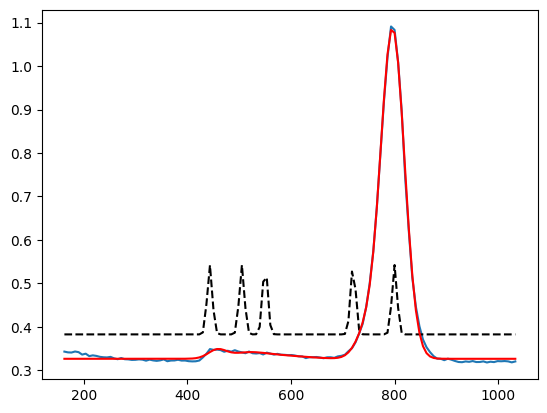

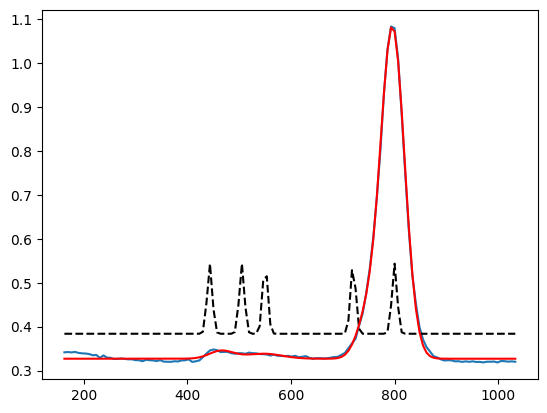

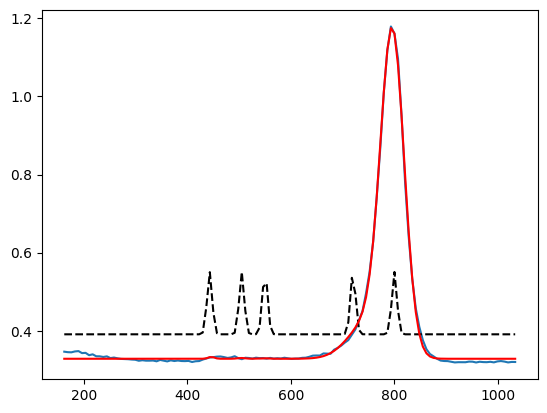

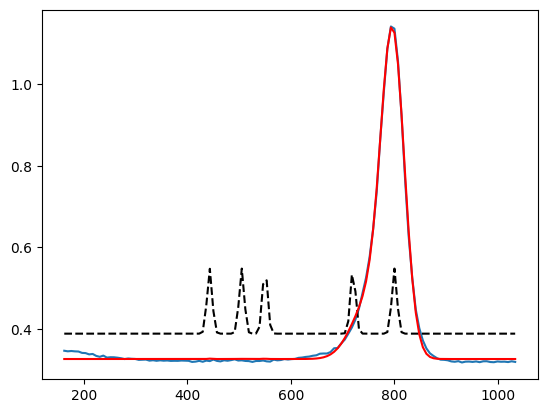

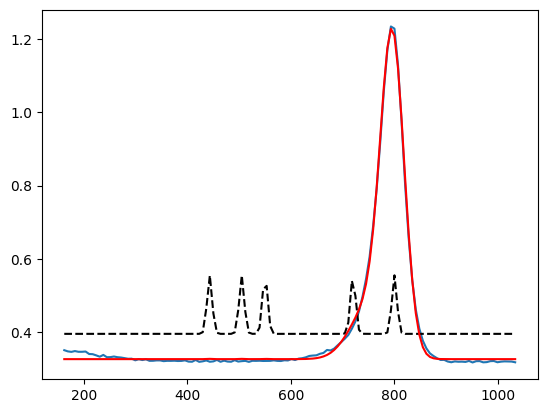

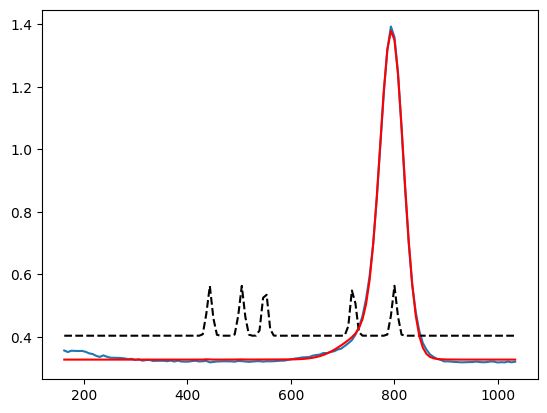

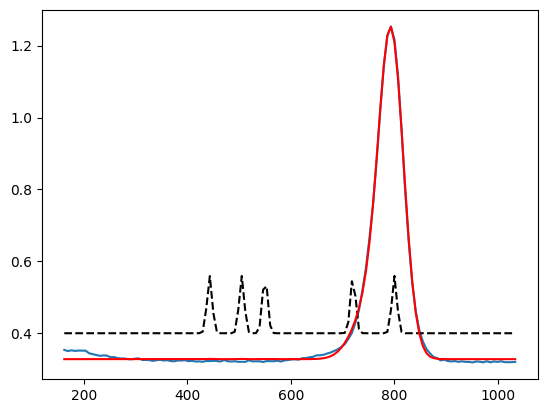

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [73]:
step = 5
dataset = hdata[::step,::step,:]/1000
result_arr = np.zeros((dataset.shape[0],dataset.shape[1],15))

for x in range(dataset.shape[0]):
  print(x)
  for y in range(dataset.shape[1]):
    temp = Gauss5Fit(wavelength, dataset[x,y,:], x == 0)
    result_arr[x,y,0] =  temp['g1_amplitude']
    result_arr[x,y,1] =  temp['g1_center']
    result_arr[x,y,2] =  temp['g1_sigma']
    result_arr[x,y,3] =  temp['g2_amplitude']
    result_arr[x,y,4] =  temp['g2_center']
    result_arr[x,y,5] =  temp['g2_sigma']
    result_arr[x,y,6] =  temp['g3_amplitude']
    result_arr[x,y,7] =  temp['g3_center']
    result_arr[x,y,8] =  temp['g3_sigma']
    result_arr[x,y,9] =  temp['g4_amplitude']
    result_arr[x,y,10] =  temp['g4_center']
    result_arr[x,y,11] =  temp['g4_sigma']
    result_arr[x,y,12] =  temp['g5_amplitude']
    result_arr[x,y,13] =  temp['g5_center']
    result_arr[x,y,14] =  temp['g5_sigma']

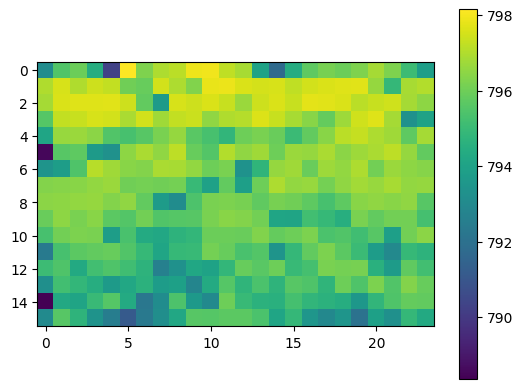

In [74]:
plt.imshow(result_arr[:,:,13])
plt.colorbar()
plt.show()

In [75]:
np.argmax(result_arr[:,:,0])

98

Now, plot maps of fit results!

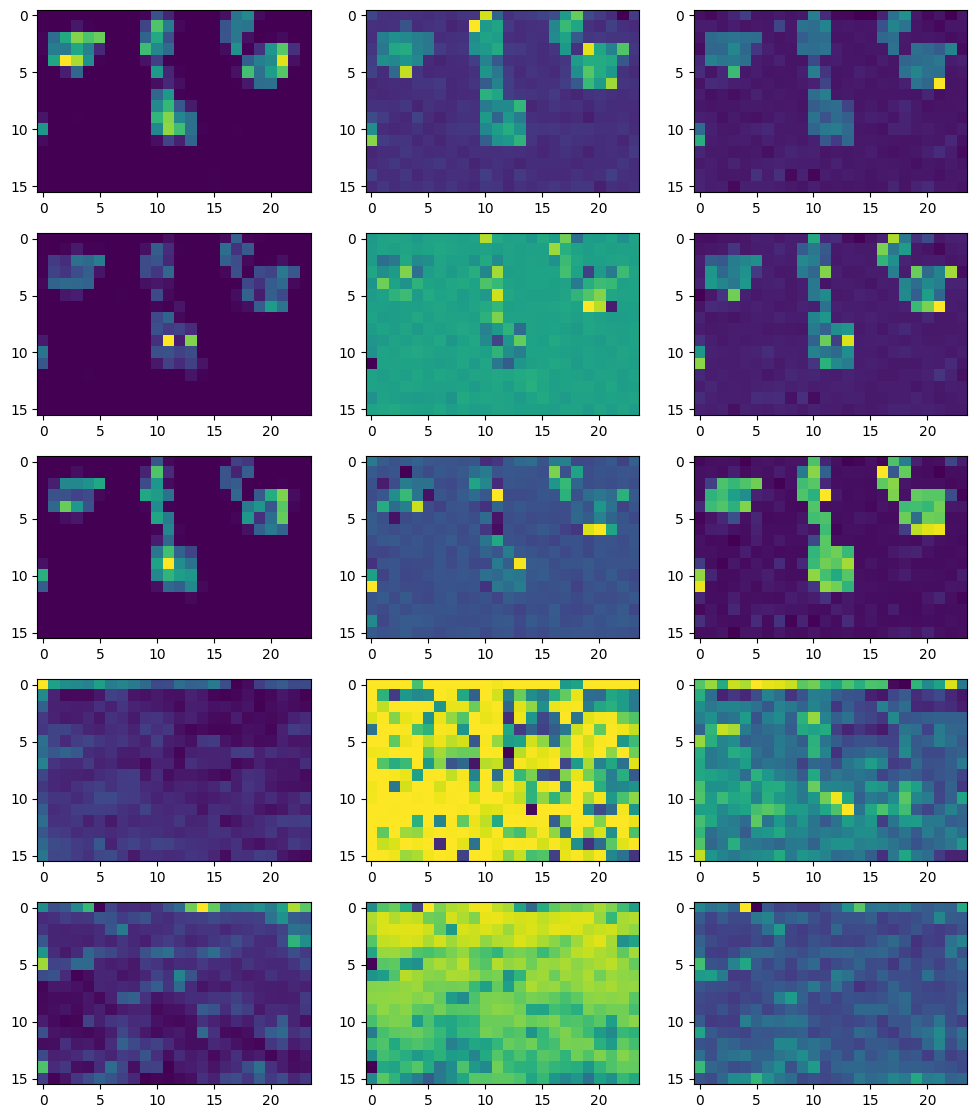

In [76]:
import matplotlib.gridspec as gridspec

rows = 5
cols = 3
gs1 = gridspec.GridSpec(rows, cols)

fig1 = plt.figure(figsize = (4*cols, 3.5*(1+rows)//1.5))
for i in range(rows*cols):
    ax1 = fig1.add_subplot(gs1[i])
    ax1.imshow(result_arr[:,:,i])
plt.show()

